In [6]:
import re

string = '''
'urethra','leukocyte',615,
'prostate gland','leukocyte',1618,
'urethra','luminal cell of prostate epithelium',1656,
'prostate gland','luminal cell of prostate epithelium',20327,
'urethra','basal cell of prostate epithelium',4426,
'prostate gland','basal cell of prostate epithelium',5208,
'urethra','fibroblast of connective tissue of prostate',900,
'prostate gland','fibroblast of connective tissue of prostate',554,
'urethra','smooth muscle cell of prostate',131,
'prostate gland','smooth muscle cell of prostate',62,
'urethra','urethra urothelial cell',6229,
'prostate gland','urethra urothelial cell',826,
'urethra','seminal vesicle glandular cell',2889,
'prostate gland','seminal vesicle glandular cell',1344,
'urethra','prostate gland microvascular endothelial cell',545,
'prostate gland','prostate gland microvascular endothelial cell',105,
'islet of Langerhans','type B pancreatic cell',11923,
'islet of Langerhans','pancreatic A cell',11541,
'islet of Langerhans','pancreatic D cell',2889,
'islet of Langerhans','pancreatic PP cell',121,
'cornea','stem cell',93,
'blood','hematopoietic stem cell',70,
'spleen','hematopoietic stem cell',73,
'bone marrow','hematopoietic stem cell',617,
'prostate gland','erythroid progenitor cell',86,
'bone marrow','erythroid progenitor cell',757,
'bone marrow','common myeloid progenitor',287,
'large intestine','fibroblast',953,
'aorta','fibroblast',2824,
'cornea','fibroblast',62,
'uterus','fibroblast',154,
'adipose tissue','fibroblast',3892,
'endometrium','fibroblast',2520,
'myometrium','fibroblast',340,
'coronary artery','fibroblast',1906,
'submandibular gland','fibroblast',543,
'parotid gland','fibroblast',1626,
'lung','fibroblast',336,
'vasculature','fibroblast',1137,
'liver','fibroblast',76,
'small intestine','fibroblast',113,
'subcutaneous adipose tissue','fibroblast',4567,
'prostate gland','fibroblast',223,
'thymus','fibroblast',3924,
'trachea','fibroblast',1239,
'anterior part of tongue','fibroblast',95,
'posterior part of tongue','fibroblast',148,
'bladder organ','fibroblast',5557,
'trachea','ciliated cell',317,
'endometrium','epithelial cell',64,
'skin of body','epithelial cell',59,
'prostate gland','epithelial cell',6848,
'anterior part of tongue','epithelial cell',2114,
'submandibular gland','duct epithelial cell',990,
'parotid gland','duct epithelial cell',703,
'exocrine pancreas','T cell',545,
'lymph node','T cell',3509,
'aorta','T cell',230,
'eye','T cell',125,
'adipose tissue','T cell',1005,
'endometrium','T cell',508,
'skin of abdomen','T cell',109,
'inguinal lymph node','T cell',339,
'coronary artery','T cell',153,
'submandibular gland','T cell',70,
'lacrimal gland','T cell',65,
'parotid gland','T cell',157,
'skin of chest','T cell',130,
'mammary gland','T cell',2324,
'vasculature','T cell',93,
'skin of body','T cell',280,
'liver','T cell',146,
'subcutaneous adipose tissue','T cell',710,
'prostate gland','T cell',586,
'rectus abdominis muscle','T cell',117,
'muscle tissue','T cell',55,
'trachea','T cell',131,
'muscle of pelvic diaphragm','T cell',198,
'bladder organ','T cell',2916,
'bone marrow','granulocyte',853,
'endocrine pancreas','mast cell',51,
'lymph node','mast cell',127,
'aorta','mast cell',72,
'skin of abdomen','mast cell',143,
'skin of chest','mast cell',113,
'skin of body','mast cell',389,
'small intestine','mast cell',65,
'trachea','mast cell',69,
'bladder organ','mast cell',1029,
'endocrine pancreas','endothelial cell',173,
'exocrine pancreas','endothelial cell',1927,
'lymph node','endothelial cell',155,
'aorta','endothelial cell',1549,
'adipose tissue','endothelial cell',1964,
'endometrium','endothelial cell',87,
'myometrium','endothelial cell',1972,
'skin of abdomen','endothelial cell',191,
'submandibular gland','endothelial cell',123,
'sclera','endothelial cell',83,
'parotid gland','endothelial cell',200,
'skin of chest','endothelial cell',416,
'skin of body','endothelial cell',702,
'spleen','endothelial cell',596,
'liver','endothelial cell',267,
'kidney','endothelial cell',95,
'subcutaneous adipose tissue','endothelial cell',1784,
'prostate gland','endothelial cell',585,
'trachea','endothelial cell',257,
'eye','microglial cell',129,
'large intestine','gut endothelial cell',53,
'adipose tissue','mesenchymal stem cell',1310,
'muscle of abdomen','mesenchymal stem cell',3787,
'rectus abdominis muscle','mesenchymal stem cell',5896,
'muscle tissue','mesenchymal stem cell',1357,
'muscle of pelvic diaphragm','mesenchymal stem cell',3108,
'cornea','melanocyte',75,
'eye','melanocyte',60,
'trachea','secretory cell',253,
'lung','club cell',1038,
'prostate gland','club cell',1078,
'large intestine','goblet cell',166,
'small intestine','goblet cell',61,
'trachea','goblet cell',84,
'exocrine pancreas','type B pancreatic cell',88,
'cardiac atrium','hepatocyte',787,
'cardiac ventricle','hepatocyte',302,
'liver','hepatocyte',1558,
'submandibular gland','myoepithelial cell',61,
'parotid gland','myoepithelial cell',135,
'adipose tissue','myofibroblast cell',312,
'subcutaneous adipose tissue','myofibroblast cell',670,
'bladder organ','myofibroblast cell',2078,
'skin of abdomen','muscle cell',123,
'skin of chest','muscle cell',169,
'skin of body','muscle cell',145,
'rectus abdominis muscle','slow muscle cell',59,
'muscle tissue','slow muscle cell',65,
'thymus','fast muscle cell',86,
'muscle tissue','fast muscle cell',149,
'muscle of pelvic diaphragm','fast muscle cell',64,
'aorta','smooth muscle cell',1232,
'coronary artery','smooth muscle cell',1273,
'vasculature','smooth muscle cell',570,
'cardiac atrium','smooth muscle cell',132,
'cardiac ventricle','smooth muscle cell',90,
'prostate gland','smooth muscle cell',285,
'trachea','smooth muscle cell',96,
'bladder organ','smooth muscle cell',290,
'blood','erythrocyte',10484,
'spleen','erythrocyte',170,
'liver','erythrocyte',108,
'bone marrow','erythrocyte',87,
'blood','platelet',239,
'lymph node','macrophage',1144,
'blood','macrophage',488,
'aorta','macrophage',1907,
'adipose tissue','macrophage',1293,
'endometrium','macrophage',290,
'skin of abdomen','macrophage',193,
'coronary artery','macrophage',805,
'submandibular gland','macrophage',637,
'sclera','macrophage',60,
'parotid gland','macrophage',1124,
'skin of chest','macrophage',125,
'mammary gland','macrophage',219,
'lung','macrophage',12160,
'vasculature','macrophage',589,
'skin of body','macrophage',528,
'spleen','macrophage',1335,
'liver','macrophage',1381,
'kidney','macrophage',321,
'subcutaneous adipose tissue','macrophage',1514,
'prostate gland','macrophage',317,
'thymus','macrophage',461,
'bone marrow','macrophage',265,
'muscle of abdomen','macrophage',147,
'rectus abdominis muscle','macrophage',763,
'muscle tissue','macrophage',423,
'trachea','macrophage',541,
'muscle of pelvic diaphragm','macrophage',656,
'bladder organ','macrophage',5338,
'endocrine pancreas','B cell',117,
'lymph node','B cell',9314,
'large intestine','B cell',497,
'eye','B cell',53,
'inguinal lymph node','B cell',5935,
'parotid gland','B cell',137,
'lung','B cell',87,
'small intestine','B cell',519,
'kidney','B cell',341,
'thymus','B cell',1919,
'trachea','B cell',462,
'bladder organ','B cell',253,
'eye','eye photoreceptor cell',566,
'retinal neural layer','eye photoreceptor cell',325,
'anterior part of tongue','keratinocyte',1764,
'posterior part of tongue','keratinocyte',1898,
'trachea','mucus secreting cell',64,
'myometrium','vascular associated smooth muscle cell',390,
'mammary gland','vascular associated smooth muscle cell',71,
'lung','vascular associated smooth muscle cell',80,
'thymus','vascular associated smooth muscle cell',2130,
'muscle tissue','tendon cell',155,
'sclera','dendritic cell',123,
'lung','dendritic cell',316,
'parotid gland','CD4-positive helper T cell',1221,
'kidney','CD4-positive helper T cell',181,
'thymus','CD4-positive helper T cell',7611,
'lymph node','stromal cell',111,
'skin of abdomen','stromal cell',634,
'sclera','stromal cell',185,
'lacrimal gland','stromal cell',107,
'skin of chest','stromal cell',861,
'skin of body','stromal cell',1448,
'cornea','corneal epithelial cell',1445,
'large intestine','monocyte',543,
'blood','monocyte',8972,
'parotid gland','monocyte',426,
'liver','monocyte',612,
'small intestine','monocyte',61,
'thymus','monocyte',434,
'bone marrow','monocyte',1389,
'large intestine','enterocyte',1464,
'small intestine','enterocyte',942,
'large intestine','CD4-positive, alpha-beta T cell',2872,
'blood','CD4-positive, alpha-beta T cell',2863,
'parotid gland','CD4-positive, alpha-beta T cell',182,
'lung','CD4-positive, alpha-beta T cell',543,
'small intestine','CD4-positive, alpha-beta T cell',5257,
'bone marrow','CD4-positive, alpha-beta T cell',2025,
'muscle tissue','CD4-positive, alpha-beta T cell',88,
'trachea','CD4-positive, alpha-beta T cell',65,
'muscle of pelvic diaphragm','CD4-positive, alpha-beta T cell',75,
'large intestine','CD8-positive, alpha-beta T cell',2147,
'blood','CD8-positive, alpha-beta T cell',1322,
'parotid gland','CD8-positive, alpha-beta T cell',1979,
'lung','CD8-positive, alpha-beta T cell',552,
'small intestine','CD8-positive, alpha-beta T cell',2323,
'kidney','CD8-positive, alpha-beta T cell',241,
'prostate gland','CD8-positive, alpha-beta T cell',1081,
'thymus','CD8-positive, alpha-beta T cell',349,
'bone marrow','CD8-positive, alpha-beta T cell',1147,
'rectus abdominis muscle','CD8-positive, alpha-beta T cell',112,
'muscle tissue','CD8-positive, alpha-beta T cell',266,
'trachea','CD8-positive, alpha-beta T cell',464,
'muscle of pelvic diaphragm','CD8-positive, alpha-beta T cell',133,
'tongue','basal cell',164,
'submandibular gland','basal cell',880,
'mammary gland','basal cell',476,
'lung','basal cell',2188,
'trachea','basal cell',4198,
'anterior part of tongue','basal cell',620,
'posterior part of tongue','basal cell',5497,
'aorta','pericyte',357,
'myometrium','pericyte',74,
'coronary artery','pericyte',526,
'submandibular gland','pericyte',99,
'mammary gland','pericyte',106,
'lung','pericyte',213,
'vasculature','pericyte',310,
'muscle of abdomen','pericyte',360,
'rectus abdominis muscle','pericyte',728,
'muscle tissue','pericyte',544,
'muscle of pelvic diaphragm','pericyte',162,
'posterior part of tongue','pericyte',84,
'bladder organ','pericyte',875,
'cornea','radial glial cell',174,
'adipose tissue','leukocyte',106,
'subcutaneous adipose tissue','leukocyte',54,
'anterior part of tongue','leukocyte',529,
'posterior part of tongue','leukocyte',1574,
'cardiac atrium','cardiac muscle cell',5327,
'cardiac ventricle','cardiac muscle cell',1878,
'endocrine pancreas','myeloid cell',57,
'exocrine pancreas','myeloid cell',1805,
'prostate gland','myeloid cell',365,
'lung','basophil',686,
'lymph node','neutrophil',99,
'blood','neutrophil',8456,
'adipose tissue','neutrophil',371,
'parotid gland','neutrophil',115,
'lung','neutrophil',174,
'spleen','neutrophil',4539,
'liver','neutrophil',83,
'small intestine','neutrophil',68,
'subcutaneous adipose tissue','neutrophil',69,
'bone marrow','neutrophil',2911,
'trachea','neutrophil',758,
'exocrine pancreas','plasma cell',63,
'lymph node','plasma cell',2555,
'large intestine','plasma cell',330,
'blood','plasma cell',488,
'inguinal lymph node','plasma cell',132,
'submandibular gland','plasma cell',309,
'mammary gland','plasma cell',194,
'lung','plasma cell',134,
'spleen','plasma cell',3171,
'small intestine','plasma cell',303,
'thymus','plasma cell',1554,
'bone marrow','plasma cell',825,
'trachea','plasma cell',138,
'bladder organ','plasma cell',1141,
'lymph node','memory B cell',3211,
'blood','memory B cell',854,
'inguinal lymph node','memory B cell',108,
'parotid gland','memory B cell',2879,
'spleen','memory B cell',6460,
'thymus','memory B cell',1845,
'bone marrow','memory B cell',310,
'lymph node','naive B cell',1330,
'blood','naive B cell',2239,
'parotid gland','naive B cell',1120,
'spleen','naive B cell',1044,
'thymus','naive B cell',874,
'bone marrow','naive B cell',142,
'skin of body','CD8-positive, alpha-beta cytotoxic T cell',85,
'thymus','CD8-positive, alpha-beta cytotoxic T cell',501,
'thymus','DN3 thymocyte',1788,
'lymph node','mature NK T cell',632,
'blood','mature NK T cell',2948,
'aorta','mature NK T cell',95,
'adipose tissue','mature NK T cell',72,
'skin of abdomen','mature NK T cell',132,
'inguinal lymph node','mature NK T cell',51,
'parotid gland','mature NK T cell',317,
'skin of chest','mature NK T cell',130,
'lung','mature NK T cell',132,
'skin of body','mature NK T cell',343,
'spleen','mature NK T cell',2439,
'liver','mature NK T cell',245,
'kidney','mature NK T cell',131,
'subcutaneous adipose tissue','mature NK T cell',500,
'prostate gland','mature NK T cell',430,
'thymus','mature NK T cell',274,
'bone marrow','mature NK T cell',678,
'muscle tissue','mature NK T cell',124,
'bladder organ','mature NK T cell',508,
'lymph node','regulatory T cell',839,
'spleen','regulatory T cell',288,
'lymph node','classical monocyte',216,
'blood','classical monocyte',7211,
'lung','classical monocyte',1487,
'spleen','classical monocyte',4443,
'lung','non-classical monocyte',1005,
'thymus','thymocyte',553,
'thymus','DN1 thymic pro-T cell',985,
'lymph node','naive thymus-derived CD4-positive, alpha-beta T cell',1439,
'blood','naive thymus-derived CD4-positive, alpha-beta T cell',412,
'inguinal lymph node','naive thymus-derived CD4-positive, alpha-beta T cell',60,
'spleen','naive thymus-derived CD4-positive, alpha-beta T cell',1261,
'lymph node','CD4-positive, alpha-beta memory T cell',1368,
'blood','CD4-positive, alpha-beta memory T cell',949,
'skin of abdomen','CD4-positive, alpha-beta memory T cell',94,
'inguinal lymph node','CD4-positive, alpha-beta memory T cell',66,
'skin of chest','CD4-positive, alpha-beta memory T cell',100,
'skin of body','CD4-positive, alpha-beta memory T cell',145,
'spleen','CD4-positive, alpha-beta memory T cell',1771,
'skin of body','naive thymus-derived CD8-positive, alpha-beta T cell',60,
'spleen','naive thymus-derived CD8-positive, alpha-beta T cell',610,
'blood','CD8-positive, alpha-beta cytokine secreting effector T cell',1493,
'lymph node','CD8-positive, alpha-beta memory T cell',825,
'skin of abdomen','CD8-positive, alpha-beta memory T cell',188,
'skin of chest','CD8-positive, alpha-beta memory T cell',125,
'skin of body','CD8-positive, alpha-beta memory T cell',544,
'spleen','CD8-positive, alpha-beta memory T cell',4301,
'lymph node','type I NK T cell',3463,
'blood','type I NK T cell',518,
'inguinal lymph node','type I NK T cell',295,
'spleen','type I NK T cell',1038,
'lymph node','effector CD4-positive, alpha-beta T cell',6197,
'inguinal lymph node','effector CD4-positive, alpha-beta T cell',711,
'lung','effector CD4-positive, alpha-beta T cell',132,
'lymph node','effector CD8-positive, alpha-beta T cell',5514,
'inguinal lymph node','effector CD8-positive, alpha-beta T cell',346,
'lung','effector CD8-positive, alpha-beta T cell',80,
'lymph node','innate lymphoid cell',1982,
'inguinal lymph node','innate lymphoid cell',438,
'spleen','innate lymphoid cell',117,
'thymus','innate lymphoid cell',2594,
'thymus','T follicular helper cell',398,
'lung','type I pneumocyte',211,
'lung','type II pneumocyte',9146,
'endocrine pancreas','pancreatic acinar cell',442,
'exocrine pancreas','pancreatic acinar cell',5092,
'large intestine','enterocyte of epithelium of large intestine',2764,
'endocrine pancreas','pancreatic ductal cell',539,
'exocrine pancreas','pancreatic ductal cell',1892,
'endometrium','endothelial cell of lymphatic vessel',81,
'submandibular gland','endothelial cell of lymphatic vessel',257,
'parotid gland','endothelial cell of lymphatic vessel',63,
'thymus','endothelial cell of lymphatic vessel',271,
'muscle of pelvic diaphragm','endothelial cell of lymphatic vessel',85,
'bladder organ','endothelial cell of lymphatic vessel',74,
'muscle of abdomen','endothelial cell of vascular tree',173,
'rectus abdominis muscle','endothelial cell of vascular tree',1085,
'muscle tissue','endothelial cell of vascular tree',535,
'muscle of pelvic diaphragm','endothelial cell of vascular tree',1809,
'lung','capillary endothelial cell',1534,
'thymus','capillary endothelial cell',1362,
'muscle of abdomen','capillary endothelial cell',342,
'rectus abdominis muscle','capillary endothelial cell',857,
'muscle tissue','capillary endothelial cell',623,
'muscle of pelvic diaphragm','capillary endothelial cell',193,
'posterior part of tongue','capillary endothelial cell',55,
'bladder organ','capillary endothelial cell',77,
'endometrium','epithelial cell of uterus',137,
'large intestine','intestinal crypt stem cell',143,
'small intestine','intestinal crypt stem cell',102,
'endocrine pancreas','pancreatic PP cell',70,
'trachea','connective tissue cell',249,
'mammary gland','luminal epithelial cell of mammary gland',5378,
'prostate gland','luminal cell of prostate epithelium',1092,
'prostate gland','basal cell of prostate epithelium',3298,
'cornea','keratocyte',73,
'eye','keratocyte',149,
'sclera','keratocyte',367,
'thymus','medullary thymic epithelial cell',166,
'myometrium','myometrial cell',197,
'lung','respiratory goblet cell',762,
'lymph node','intermediate monocyte',283,
'lung','intermediate monocyte',252,
'spleen','intermediate monocyte',131,
'lymph node','CD141-positive myeloid dendritic cell',100,
'spleen','CD141-positive myeloid dendritic cell',51,
'lymph node','CD1c-positive myeloid dendritic cell',78,
'skin of body','CD1c-positive myeloid dendritic cell',110,
'spleen','CD1c-positive myeloid dendritic cell',51,
'exocrine pancreas','pancreatic stellate cell',386,
'parotid gland','adventitial cell',442,
'lung','adventitial cell',373,
'kidney','kidney epithelial cell',8331,
'mammary gland','vein endothelial cell',263,
'lung','vein endothelial cell',508,
'thymus','vein endothelial cell',2104,
'anterior part of tongue','vein endothelial cell',102,
'posterior part of tongue','vein endothelial cell',124,
'bladder organ','vein endothelial cell',278,
'cardiac atrium','fibroblast of cardiac tissue',135,
'cardiac ventricle','fibroblast of cardiac tissue',115,
'cornea','retinal blood vessel endothelial cell',158,
'sclera','retinal blood vessel endothelial cell',284,
'lung','bronchial smooth muscle cell',81,
'submandibular gland','acinar cell of salivary gland',2095,
'parotid gland','acinar cell of salivary gland',8052,
'thymus','naive regulatory T cell',761,
'submandibular gland','ionocyte',87,
'muscle of abdomen','skeletal muscle satellite stem cell',1113,
'rectus abdominis muscle','skeletal muscle satellite stem cell',2101,
'muscle tissue','skeletal muscle satellite stem cell',421,
'muscle of pelvic diaphragm','skeletal muscle satellite stem cell',1196,
'large intestine','paneth cell of colon',888,
'large intestine','transit amplifying cell of colon',208,
'small intestine','transit amplifying cell of small intestine',227,
'large intestine','intestinal crypt stem cell of large intestine',114,
'small intestine','intestinal crypt stem cell of small intestine',71,
'cardiac atrium','cardiac endothelial cell',1860,
'cardiac ventricle','cardiac endothelial cell',805,
'small intestine','intestinal tuft cell',160,
'lung','lung ciliated cell',602,
'large intestine','large intestine goblet cell',385,
'trachea','tracheal goblet cell',77,
'small intestine','enterocyte of epithelium of small intestine',1100,
'small intestine','paneth cell of epithelium of small intestine',647,
'liver','endothelial cell of hepatic sinusoid',421,
'coronary artery','endothelial cell of artery',117,
'mammary gland','endothelial cell of artery',168,
'lung','endothelial cell of artery',187,
'thymus','endothelial cell of artery',536,
'cornea','conjunctival epithelial cell',1275,
'eye','conjunctival epithelial cell',1169,
'sclera','conjunctival epithelial cell',64,
'conjunctiva','conjunctival epithelial cell',2078,
'eye','epithelial cell of lacrimal sac',52,
'small intestine','small intestine goblet cell',300,
'bladder organ','bladder urothelial cell',4151,
'large intestine','intestinal enteroendocrine cell',55,
'small intestine','intestinal enteroendocrine cell',58,
'lung','lung microvascular endothelial cell',485,
'mammary gland','fibroblast of breast',2066,
'eye','Mueller cell',62,
'retinal neural layer','Mueller cell',297,
'limb muscle','T cell',1254,
'limb muscle','endothelial cell',6894,
'limb muscle','mesenchymal stem cell',13037,
'limb muscle','cell of skeletal muscle',192,
'limb muscle','smooth muscle cell',1165,
'limb muscle','macrophage',2485,
'limb muscle','B cell',1511,
'limb muscle','skeletal muscle satellite cell',2055,
'limb muscle','Schwann cell',274,
'lung parenchyma','fibroblast',276,
'lung parenchyma','mesothelial cell',229,
'respiratory airway','epithelial cell of lung',446,
'lung parenchyma','epithelial cell of lung',3529,
'respiratory airway','T cell',95,
'lung parenchyma','T cell',400,
'nose','mast cell',185,
'respiratory airway','mast cell',1684,
'lung parenchyma','mast cell',4754,
'nose','club cell',25629,
'respiratory airway','club cell',9661,
'lung parenchyma','club cell',2821,
'respiratory airway','myofibroblast cell',116,
'lung parenchyma','myofibroblast cell',600,
'respiratory airway','smooth muscle cell',69,
'lung parenchyma','smooth muscle cell',487,
'nose','B cell',166,
'respiratory airway','B cell',1930,
'lung parenchyma','B cell',2415,
'nose','serous secreting cell',1460,
'nose','mucus secreting cell',187,
'respiratory airway','mucus secreting cell',349,
'lung parenchyma','dendritic cell',268,
'respiratory airway','stromal cell',278,
'lung parenchyma','stromal cell',57,
'respiratory airway','alveolar macrophage',5383,
'lung parenchyma','alveolar macrophage',73414,
'nose','acinar cell',264,
'respiratory airway','acinar cell',1008,
'nose','natural killer cell',68,
'respiratory airway','natural killer cell',2032,
'lung parenchyma','natural killer cell',14878,
'nose','CD4-positive, alpha-beta T cell',285,
'respiratory airway','CD4-positive, alpha-beta T cell',5298,
'lung parenchyma','CD4-positive, alpha-beta T cell',15702,
'nose','CD8-positive, alpha-beta T cell',1450,
'respiratory airway','CD8-positive, alpha-beta T cell',12692,
'lung parenchyma','CD8-positive, alpha-beta T cell',14932,
'respiratory airway','pericyte',784,
'lung parenchyma','pericyte',2248,
'nose','plasmacytoid dendritic cell',235,
'respiratory airway','plasmacytoid dendritic cell',146,
'lung parenchyma','plasmacytoid dendritic cell',171,
'respiratory airway','plasma cell',514,
'lung parenchyma','plasma cell',1255,
'nose','classical monocyte',155,
'respiratory airway','classical monocyte',2086,
'lung parenchyma','classical monocyte',15454,
'respiratory airway','elicited macrophage',2117,
'lung parenchyma','elicited macrophage',26057,
'respiratory airway','non-classical monocyte',408,
'lung parenchyma','non-classical monocyte',8415,
'respiratory airway','conventional dendritic cell',66,
'lung parenchyma','conventional dendritic cell',249,
'respiratory airway','type I pneumocyte',526,
'lung parenchyma','type I pneumocyte',7411,
'respiratory airway','type II pneumocyte',1979,
'lung parenchyma','type II pneumocyte',60196,
'respiratory airway','brush cell of trachebronchial tree',139,
'respiratory airway','endothelial cell of lymphatic vessel',230,
'lung parenchyma','endothelial cell of lymphatic vessel',4361,
'nose','ciliated columnar cell of tracheobronchial tree',4597,
'respiratory airway','ciliated columnar cell of tracheobronchial tree',20448,
'lung parenchyma','ciliated columnar cell of tracheobronchial tree',10180,
'nose','CD1c-positive myeloid dendritic cell',1083,
'respiratory airway','CD1c-positive myeloid dendritic cell',2427,
'lung parenchyma','CD1c-positive myeloid dendritic cell',5623,
'nose','nasal mucosa goblet cell',33183,
'respiratory airway','nasal mucosa goblet cell',2536,
'lung parenchyma','nasal mucosa goblet cell',114,
'nose','vein endothelial cell',148,
'respiratory airway','vein endothelial cell',4917,
'lung parenchyma','vein endothelial cell',7910,
'respiratory airway','fibroblast of lung',1401,
'lung parenchyma','fibroblast of lung',14088,
'nose','respiratory basal cell',3651,
'respiratory airway','respiratory basal cell',80421,
'lung parenchyma','respiratory basal cell',641,
'nose','ionocyte',140,
'respiratory airway','ionocyte',387,
'nose','multi-ciliated epithelial cell',5157,
'respiratory airway','multi-ciliated epithelial cell',493,
'lung parenchyma','multi-ciliated epithelial cell',223,
'respiratory airway','tracheobronchial serous cell',1404,
'respiratory airway','tracheobronchial goblet cell',953,
'respiratory airway','tracheobronchial smooth muscle cell',1052,
'lung parenchyma','tracheobronchial smooth muscle cell',1939,
'respiratory airway','lung neuroendocrine cell',140,
'respiratory airway','bronchial goblet cell',1592,
'lung parenchyma','bronchial goblet cell',75,
'respiratory airway','pulmonary artery endothelial cell',516,
'lung parenchyma','pulmonary artery endothelial cell',6866,
'respiratory airway','lung macrophage',186,
'lung parenchyma','lung macrophage',4604,
'respiratory airway','bronchus fibroblast of lung',1244,
'lung parenchyma','bronchus fibroblast of lung',288,
'respiratory airway','alveolar capillary type 2 endothelial cell',1276,
'lung parenchyma','alveolar capillary type 2 endothelial cell',5881,
'respiratory airway','alveolar capillary type 1 endothelial cell',1719,
'lung parenchyma','alveolar capillary type 1 endothelial cell',14329,
'heart right ventricle','mast cell',490,
'heart left ventricle','mast cell',924,
'interventricular septum','mast cell',427,
'apex of heart','mast cell',272,
'heart right ventricle','endothelial cell',30469,
'heart left ventricle','endothelial cell',53224,
'interventricular septum','endothelial cell',30300,
'apex of heart','endothelial cell',1555,
'heart right ventricle','fat cell',1468,
'heart left ventricle','fat cell',668,
'interventricular septum','fat cell',207,
'apex of heart','fat cell',233,
'heart right ventricle','lymphocyte',5514,
'heart left ventricle','lymphocyte',7106,
'interventricular septum','lymphocyte',3805,
'apex of heart','lymphocyte',301,
'heart right ventricle','cardiac muscle cell',77216,
'heart left ventricle','cardiac muscle cell',151583,
'interventricular septum','cardiac muscle cell',70736,
'apex of heart','cardiac muscle cell',11883,
'heart right ventricle','myeloid cell',15659,
'heart left ventricle','myeloid cell',27619,
'interventricular septum','myeloid cell',13372,
'apex of heart','myeloid cell',386,
'heart right ventricle','fibroblast of cardiac tissue',39694,
'heart left ventricle','fibroblast of cardiac tissue',65102,
'interventricular septum','fibroblast of cardiac tissue',36301,
'apex of heart','fibroblast of cardiac tissue',1719,
'heart right ventricle','mural cell',42375,
'heart left ventricle','mural cell',82552,
'interventricular septum','mural cell',38502,
'apex of heart','mural cell',6852,
'heart right ventricle','cardiac neuron',2758,
'heart left ventricle','cardiac neuron',4478,
'interventricular septum','cardiac neuron',2152,
'apex of heart','cardiac neuron',198,
'heart right ventricle','native cell',15080,
'heart left ventricle','native cell',25857,
'interventricular septum','native cell',11071,
'apex of heart','native cell',973,
'mucosa','fibroblast',2848,
'esophagus muscularis mucosa','fibroblast',10580,
'lingula of left lung','fibroblast',1483,
'anterior wall of left ventricle','fibroblast',8990,
'mucosa','squamous epithelial cell',2770,
'mucosa','T cell',1620,
'gastrocnemius','T cell',66,
'skin of leg','T cell',74,
'prostate gland','T cell',611,
'esophagus muscularis mucosa','T cell',236,
'lingula of left lung','T cell',611,
'anterior wall of left ventricle','T cell',345,
'esophagus muscularis mucosa','mast cell',685,
'lingula of left lung','mast cell',65,
'anterior wall of left ventricle','mast cell',65,
'esophagus muscularis mucosa','fat cell',168,
'gastrocnemius','professional antigen presenting cell',197,
'skin of leg','professional antigen presenting cell',107,
'anterior wall of left ventricle','professional antigen presenting cell',3043,
'mucosa','glandular epithelial cell',459,
'prostate gland','neuroendocrine cell',79,
'breast','contractile cell',130,
'mucosa','contractile cell',504,
'gastrocnemius','contractile cell',448,
'skin of leg','contractile cell',190,
'prostate gland','contractile cell',224,
'esophagus muscularis mucosa','contractile cell',965,
'lingula of left lung','contractile cell',158,
'anterior wall of left ventricle','contractile cell',2459,
'gastrocnemius','slow muscle cell',646,
'gastrocnemius','fast muscle cell',1581,
'esophagus muscularis mucosa','smooth muscle cell',4385,
'anterior wall of left ventricle','smooth muscle cell',209,
'breast','macrophage',318,
'mucosa','macrophage',974,
'gastrocnemius','macrophage',432,
'prostate gland','macrophage',856,
'esophagus muscularis mucosa','macrophage',1679,
'lingula of left lung','macrophage',683,
'anterior wall of left ventricle','macrophage',3062,
'mucosa','B cell',157,
'lingula of left lung','B cell',62,
'skin of leg','keratinocyte',261,
'skin of leg','epidermal cell',446,
'mucosa','dendritic cell',257,
'esophagus muscularis mucosa','dendritic cell',539,
'lingula of left lung','alveolar macrophage',5229,
'gastrocnemius','skeletal muscle satellite cell',461,
'mucosa','basal cell',2399,
'anterior wall of left ventricle','cardiac muscle cell',9619,
'gastrocnemius','neutrophil',63,
'prostate gland','neutrophil',164,
'mucosa','myeloid dendritic cell',126,
'lingula of left lung','mature NK T cell',78,
'anterior wall of left ventricle','mature NK T cell',319,
'lingula of left lung','elicited macrophage',80,
'esophagus muscularis mucosa','interstitial cell of Cajal',225,
'breast','endothelial cell of lymphatic vessel',108,
'mucosa','endothelial cell of lymphatic vessel',1549,
'gastrocnemius','endothelial cell of lymphatic vessel',209,
'skin of leg','endothelial cell of lymphatic vessel',290,
'prostate gland','endothelial cell of lymphatic vessel',247,
'esophagus muscularis mucosa','endothelial cell of lymphatic vessel',1210,
'lingula of left lung','endothelial cell of lymphatic vessel',338,
'anterior wall of left ventricle','endothelial cell of lymphatic vessel',553,
'breast','endothelial cell of vascular tree',751,
'mucosa','endothelial cell of vascular tree',3136,
'gastrocnemius','endothelial cell of vascular tree',1117,
'skin of leg','endothelial cell of vascular tree',721,
'prostate gland','endothelial cell of vascular tree',2600,
'esophagus muscularis mucosa','endothelial cell of vascular tree',3275,
'lingula of left lung','endothelial cell of vascular tree',2437,
'anterior wall of left ventricle','endothelial cell of vascular tree',6846,
'skin of leg','basal cell of epidermis',1815,
'prostate gland','epithelial cell of prostate',4587,
'prostate gland','basal epithelial cell of prostatic duct',7295,
'breast','myoepithelial cell of mammary gland',399,
'mucosa','myoepithelial cell of mammary gland',973,
'breast','luminal epithelial cell of mammary gland',5546,
'lingula of left lung','bronchial epithelial cell',693,
'mucosa','basal epithelial cell of tracheobronchial tree',8145,
'prostate gland','luminal cell of prostate epithelium',11104,
'esophagus muscularis mucosa','enteric smooth muscle cell',9159,
'breast','subcutaneous fat cell',1756,
'gastrocnemius','subcutaneous fat cell',150,
'skin of leg','subcutaneous fat cell',57,
'anterior wall of left ventricle','subcutaneous fat cell',189,
'anterior wall of left ventricle','fibroblast of cardiac tissue',297,
'mucosa','Schwann cell',63,
'prostate gland','Schwann cell',67,
'esophagus muscularis mucosa','Schwann cell',970,
'anterior wall of left ventricle','Schwann cell',294,
'skin of leg','skin fibroblast',505,
'prostate gland','skin fibroblast',1139,
'lingula of left lung','respiratory basal cell',1062,
'gastrocnemius','skeletal muscle fiber',19491,
'lingula of left lung','epithelial cell of alveolus of lung',22305,
'anterior wall of left ventricle','cardiac endothelial cell',265,
'gastrocnemius','skeletal muscle fibroblast',5913,
'skin of leg','epithelial cell of sweat gland',301,
'skin of leg','melanocyte of skin',266,
'prostate gland','smooth muscle cell of prostate',2006,
'skin of leg','sebaceous gland cell',233,
'breast','fibroblast of breast',762,
'prostate gland','fibroblast of connective tissue of prostate',554,
'urethra','fibroblast of connective tissue of prostate',900,
'prostate gland','smooth muscle cell of prostate',62,
'urethra','smooth muscle cell of prostate',131,
'blood','CD16-negative, CD56-bright natural killer cell, human',445,
'bone marrow','CD16-negative, CD56-bright natural killer cell, human',832,
'jejunal epithelium','CD16-negative, CD56-bright natural killer cell, human',99,
'lamina propria','CD16-negative, CD56-bright natural killer cell, human',72,
'liver','CD16-negative, CD56-bright natural killer cell, human',1705,
'lung','CD16-negative, CD56-bright natural killer cell, human',462,
'mesenteric lymph node','CD16-negative, CD56-bright natural killer cell, human',627,
'spleen','CD16-negative, CD56-bright natural killer cell, human',3891,
'thoracic lymph node','CD16-negative, CD56-bright natural killer cell, human',740,
'blood','CD16-positive, CD56-dim natural killer cell, human',3539,
'bone marrow','CD16-positive, CD56-dim natural killer cell, human',7394,
'lamina propria','CD16-positive, CD56-dim natural killer cell, human',71,
'liver','CD16-positive, CD56-dim natural killer cell, human',1882,
'lung','CD16-positive, CD56-dim natural killer cell, human',2771,
'mesenteric lymph node','CD16-positive, CD56-dim natural killer cell, human',364,
'skeletal muscle tissue','CD16-positive, CD56-dim natural killer cell, human',120,
'spleen','CD16-positive, CD56-dim natural killer cell, human',4319,
'thoracic lymph node','CD16-positive, CD56-dim natural killer cell, human',71,
'bone marrow','CD4-positive helper T cell',167,
'duodenum','CD4-positive helper T cell',166,
'ileum','CD4-positive helper T cell',163,
'jejunal epithelium','CD4-positive helper T cell',3333,
'lamina propria','CD4-positive helper T cell',7699,
'liver','CD4-positive helper T cell',587,
'lung','CD4-positive helper T cell',1876,
'mesenteric lymph node','CD4-positive helper T cell',497,
'omentum','CD4-positive helper T cell',95,
'spleen','CD4-positive helper T cell',571,
'thoracic lymph node','CD4-positive helper T cell',861,
'bone marrow','CD8-positive, alpha-beta memory T cell',63,
'caecum','CD8-positive, alpha-beta memory T cell',58,
'duodenum','CD8-positive, alpha-beta memory T cell',225,
'ileum','CD8-positive, alpha-beta memory T cell',312,
'jejunal epithelium','CD8-positive, alpha-beta memory T cell',15907,
'lamina propria','CD8-positive, alpha-beta memory T cell',7072,
'liver','CD8-positive, alpha-beta memory T cell',115,
'lung','CD8-positive, alpha-beta memory T cell',82,
'mesenteric lymph node','CD8-positive, alpha-beta memory T cell',431,
'spleen','CD8-positive, alpha-beta memory T cell',1023,
'thoracic lymph node','CD8-positive, alpha-beta memory T cell',171,
'blood','CD8-positive, alpha-beta memory T cell, CD45RO-positive',635,
'bone marrow','CD8-positive, alpha-beta memory T cell, CD45RO-positive',2895,
'jejunal epithelium','CD8-positive, alpha-beta memory T cell, CD45RO-positive',60,
'lamina propria','CD8-positive, alpha-beta memory T cell, CD45RO-positive',295,
'liver','CD8-positive, alpha-beta memory T cell, CD45RO-positive',806,
'lung','CD8-positive, alpha-beta memory T cell, CD45RO-positive',417,
'mesenteric lymph node','CD8-positive, alpha-beta memory T cell, CD45RO-positive',759,
'omentum','CD8-positive, alpha-beta memory T cell, CD45RO-positive',71,
'spleen','CD8-positive, alpha-beta memory T cell, CD45RO-positive',4984,
'thoracic lymph node','CD8-positive, alpha-beta memory T cell, CD45RO-positive',1655,
'blood','T follicular helper cell',111,
'bone marrow','T follicular helper cell',267,
'lung','T follicular helper cell',79,
'mesenteric lymph node','T follicular helper cell',2672,
'spleen','T follicular helper cell',4371,
'thoracic lymph node','T follicular helper cell',7677,
'blood','alpha-beta T cell',270,
'bone marrow','alpha-beta T cell',301,
'duodenum','alpha-beta T cell',77,
'jejunal epithelium','alpha-beta T cell',985,
'lamina propria','alpha-beta T cell',579,
'liver','alpha-beta T cell',331,
'lung','alpha-beta T cell',248,
'mesenteric lymph node','alpha-beta T cell',537,
'spleen','alpha-beta T cell',703,
'thoracic lymph node','alpha-beta T cell',1412,
'thymus','alpha-beta T cell',60,
'lung','alveolar macrophage',16976,
'thoracic lymph node','alveolar macrophage',97,
'blood','animal cell',235,
'bone marrow','animal cell',1102,
'jejunal epithelium','animal cell',102,
'lamina propria','animal cell',108,
'liver','animal cell',221,
'lung','animal cell',1523,
'mesenteric lymph node','animal cell',111,
'spleen','animal cell',639,
'thoracic lymph node','animal cell',345,
'blood','classical monocyte',5850,
'bone marrow','classical monocyte',5032,
'lamina propria','classical monocyte',59,
'liver','classical monocyte',1495,
'lung','classical monocyte',3380,
'skeletal muscle tissue','classical monocyte',105,
'spleen','classical monocyte',5714,
'thoracic lymph node','classical monocyte',115,
'blood','conventional dendritic cell',114,
'bone marrow','conventional dendritic cell',200,
'lamina propria','conventional dendritic cell',76,
'liver','conventional dendritic cell',124,
'lung','conventional dendritic cell',408,
'mesenteric lymph node','conventional dendritic cell',84,
'spleen','conventional dendritic cell',303,
'thoracic lymph node','conventional dendritic cell',110,
'lung','dendritic cell, human',84,
'thoracic lymph node','dendritic cell, human',95,
'blood','effector memory CD4-positive, alpha-beta T cell',4331,
'bone marrow','effector memory CD4-positive, alpha-beta T cell',2637,
'jejunal epithelium','effector memory CD4-positive, alpha-beta T cell',86,
'liver','effector memory CD4-positive, alpha-beta T cell',259,
'lung','effector memory CD4-positive, alpha-beta T cell',947,
'mesenteric lymph node','effector memory CD4-positive, alpha-beta T cell',912,
'skeletal muscle tissue','effector memory CD4-positive, alpha-beta T cell',53,
'spleen','effector memory CD4-positive, alpha-beta T cell',3837,
'thoracic lymph node','effector memory CD4-positive, alpha-beta T cell',6696,
'blood','effector memory CD8-positive, alpha-beta T cell, terminally differentiated',1983,
'bone marrow','effector memory CD8-positive, alpha-beta T cell, terminally differentiated',6684,
'jejunal epithelium','effector memory CD8-positive, alpha-beta T cell, terminally differentiated',277,
'lamina propria','effector memory CD8-positive, alpha-beta T cell, terminally differentiated',130,
'liver','effector memory CD8-positive, alpha-beta T cell, terminally differentiated',750,
'lung','effector memory CD8-positive, alpha-beta T cell, terminally differentiated',945,
'mesenteric lymph node','effector memory CD8-positive, alpha-beta T cell, terminally differentiated',267,
'skeletal muscle tissue','effector memory CD8-positive, alpha-beta T cell, terminally differentiated',211,
'spleen','effector memory CD8-positive, alpha-beta T cell, terminally differentiated',3127,
'thoracic lymph node','effector memory CD8-positive, alpha-beta T cell, terminally differentiated',131,
'bone marrow','erythroid lineage cell',413,
'bone marrow','gamma-delta T cell',1028,
'caecum','gamma-delta T cell',56,
'ileum','gamma-delta T cell',122,
'jejunal epithelium','gamma-delta T cell',5288,
'lamina propria','gamma-delta T cell',1318,
'liver','gamma-delta T cell',1043,
'lung','gamma-delta T cell',165,
'mesenteric lymph node','gamma-delta T cell',150,
'spleen','gamma-delta T cell',2104,
'thoracic lymph node','gamma-delta T cell',143,
'mesenteric lymph node','germinal center B cell',103,
'spleen','germinal center B cell',138,
'thoracic lymph node','germinal center B cell',244,
'lamina propria','group 3 innate lymphoid cell',86,
'mesenteric lymph node','group 3 innate lymphoid cell',485,
'spleen','group 3 innate lymphoid cell',327,
'thoracic lymph node','group 3 innate lymphoid cell',267,
'blood','lymphocyte',277,
'bone marrow','lymphocyte',848,
'duodenum','lymphocyte',122,
'jejunal epithelium','lymphocyte',102,
'lamina propria','lymphocyte',111,
'liver','lymphocyte',170,
'lung','lymphocyte',240,
'mesenteric lymph node','lymphocyte',142,
'spleen','lymphocyte',927,
'thoracic lymph node','lymphocyte',587,
'bone marrow','macrophage',66,
'jejunal epithelium','macrophage',68,
'lamina propria','macrophage',571,
'liver','macrophage',476,
'lung','macrophage',2221,
'mesenteric lymph node','macrophage',221,
'spleen','macrophage',1096,
'thoracic lymph node','macrophage',102,
'bone marrow','mast cell',86,
'jejunal epithelium','mast cell',59,
'lamina propria','mast cell',2123,
'lung','mast cell',823,
'spleen','mast cell',61,
'thoracic lymph node','mast cell',74,
'blood','megakaryocyte',163,
'bone marrow','megakaryocyte',108,
'blood','memory B cell',192,
'bone marrow','memory B cell',685,
'ileum','memory B cell',98,
'lamina propria','memory B cell',70,
'liver','memory B cell',180,
'lung','memory B cell',143,
'mesenteric lymph node','memory B cell',3690,
'omentum','memory B cell',90,
'skeletal muscle tissue','memory B cell',52,
'spleen','memory B cell',14655,
'thoracic lymph node','memory B cell',10125,
'thymus','memory B cell',53,
'blood','mucosal invariant T cell',107,
'bone marrow','mucosal invariant T cell',427,
'jejunal epithelium','mucosal invariant T cell',54,
'liver','mucosal invariant T cell',2239,
'lung','mucosal invariant T cell',124,
'mesenteric lymph node','mucosal invariant T cell',136,
'spleen','mucosal invariant T cell',1519,
'thoracic lymph node','mucosal invariant T cell',169,
'blood','naive B cell',194,
'bone marrow','naive B cell',765,
'jejunal epithelium','naive B cell',59,
'liver','naive B cell',106,
'lung','naive B cell',79,
'mesenteric lymph node','naive B cell',1555,
'spleen','naive B cell',6646,
'thoracic lymph node','naive B cell',4503,
'blood','naive thymus-derived CD4-positive, alpha-beta T cell',6609,
'bone marrow','naive thymus-derived CD4-positive, alpha-beta T cell',4590,
'jejunal epithelium','naive thymus-derived CD4-positive, alpha-beta T cell',309,
'lamina propria','naive thymus-derived CD4-positive, alpha-beta T cell',70,
'liver','naive thymus-derived CD4-positive, alpha-beta T cell',62,
'lung','naive thymus-derived CD4-positive, alpha-beta T cell',185,
'mesenteric lymph node','naive thymus-derived CD4-positive, alpha-beta T cell',5121,
'spleen','naive thymus-derived CD4-positive, alpha-beta T cell',4951,
'thoracic lymph node','naive thymus-derived CD4-positive, alpha-beta T cell',15645,
'blood','naive thymus-derived CD8-positive, alpha-beta T cell',1182,
'bone marrow','naive thymus-derived CD8-positive, alpha-beta T cell',629,
'mesenteric lymph node','naive thymus-derived CD8-positive, alpha-beta T cell',1187,
'spleen','naive thymus-derived CD8-positive, alpha-beta T cell',982,
'thoracic lymph node','naive thymus-derived CD8-positive, alpha-beta T cell',3653,
'thymus','naive thymus-derived CD8-positive, alpha-beta T cell',78,
'blood','non-classical monocyte',236,
'bone marrow','non-classical monocyte',586,
'liver','non-classical monocyte',458,
'lung','non-classical monocyte',752,
'skeletal muscle tissue','non-classical monocyte',71,
'spleen','non-classical monocyte',254,
'blood','plasma cell',66,
'bone marrow','plasma cell',239,
'caecum','plasma cell',175,
'lamina propria','plasma cell',2942,
'liver','plasma cell',171,
'spleen','plasma cell',1992,
'thoracic lymph node','plasma cell',508,
'transverse colon','plasma cell',60,
'bone marrow','plasmablast',175,
'spleen','plasmablast',875,
'thoracic lymph node','plasmablast',531,
'bone marrow','plasmacytoid dendritic cell',374,
'lung','plasmacytoid dendritic cell',63,
'spleen','plasmacytoid dendritic cell',97,
'thoracic lymph node','plasmacytoid dendritic cell',92,
'bone marrow','precursor B cell',72,
'blood','progenitor cell',61,
'bone marrow','progenitor cell',1312,
'spleen','progenitor cell',95,
'blood','regulatory T cell',798,
'bone marrow','regulatory T cell',435,
'lamina propria','regulatory T cell',68,
'lung','regulatory T cell',256,
'mesenteric lymph node','regulatory T cell',2965,
'spleen','regulatory T cell',1643,
'thoracic lymph node','regulatory T cell',5806,
'blood','B cell',510,
'blood','CD14-low, CD16-positive monocyte',1923,
'blood','CD14-positive monocyte',23648,
'blood','CD16-negative, CD56-bright natural killer cell, human',3638,
'blood','CD16-positive, CD56-dim natural killer cell, human',6948,
'blood','CD4-positive, alpha-beta memory T cell',3276,
'blood','CD8-positive, alpha-beta memory T cell',6224,
'blood','T cell',1697,
'blood','conventional dendritic cell',543,
'blood','erythrocyte',3907,
'blood','gamma-delta T cell',216,
'blood','hematopoietic stem cell',270,
'blood','immature B cell',255,
'blood','mature NK T cell',1807,
'blood','memory B cell',457,
'blood','mucosal invariant T cell',223,
'blood','naive B cell',8679,
'blood','naive thymus-derived CD4-positive, alpha-beta T cell',26887,
'blood','naive thymus-derived CD8-positive, alpha-beta T cell',2387,
'blood','natural killer cell',226,
'blood','neutrophil',299,
'blood','plasma cell',415,
'blood','plasmablast',1239,
'blood','plasmacytoid dendritic cell',75,
'blood','platelet',1444,
'blood','regulatory T cell',306,
'''
tissue_list = []
cell_type_list = []
cell_number_list = []

pattern = r"'([^']*)','([^']*)',(\d+),"

matches = re.findall(pattern, string)

for match in matches:
    tissue_list.append(match[0])
    cell_type_list.append(match[1])
    cell_number_list.append(int(match[2]))

print((tissue_list))
print((cell_type_list))
print((cell_number_list))



['urethra', 'prostate gland', 'urethra', 'prostate gland', 'urethra', 'prostate gland', 'urethra', 'prostate gland', 'urethra', 'prostate gland', 'urethra', 'prostate gland', 'urethra', 'prostate gland', 'urethra', 'prostate gland', 'islet of Langerhans', 'islet of Langerhans', 'islet of Langerhans', 'islet of Langerhans', 'cornea', 'blood', 'spleen', 'bone marrow', 'prostate gland', 'bone marrow', 'bone marrow', 'large intestine', 'aorta', 'cornea', 'uterus', 'adipose tissue', 'endometrium', 'myometrium', 'coronary artery', 'submandibular gland', 'parotid gland', 'lung', 'vasculature', 'liver', 'small intestine', 'subcutaneous adipose tissue', 'prostate gland', 'thymus', 'trachea', 'anterior part of tongue', 'posterior part of tongue', 'bladder organ', 'trachea', 'endometrium', 'skin of body', 'prostate gland', 'anterior part of tongue', 'submandibular gland', 'parotid gland', 'exocrine pancreas', 'lymph node', 'aorta', 'eye', 'adipose tissue', 'endometrium', 'skin of abdomen', 'ingui

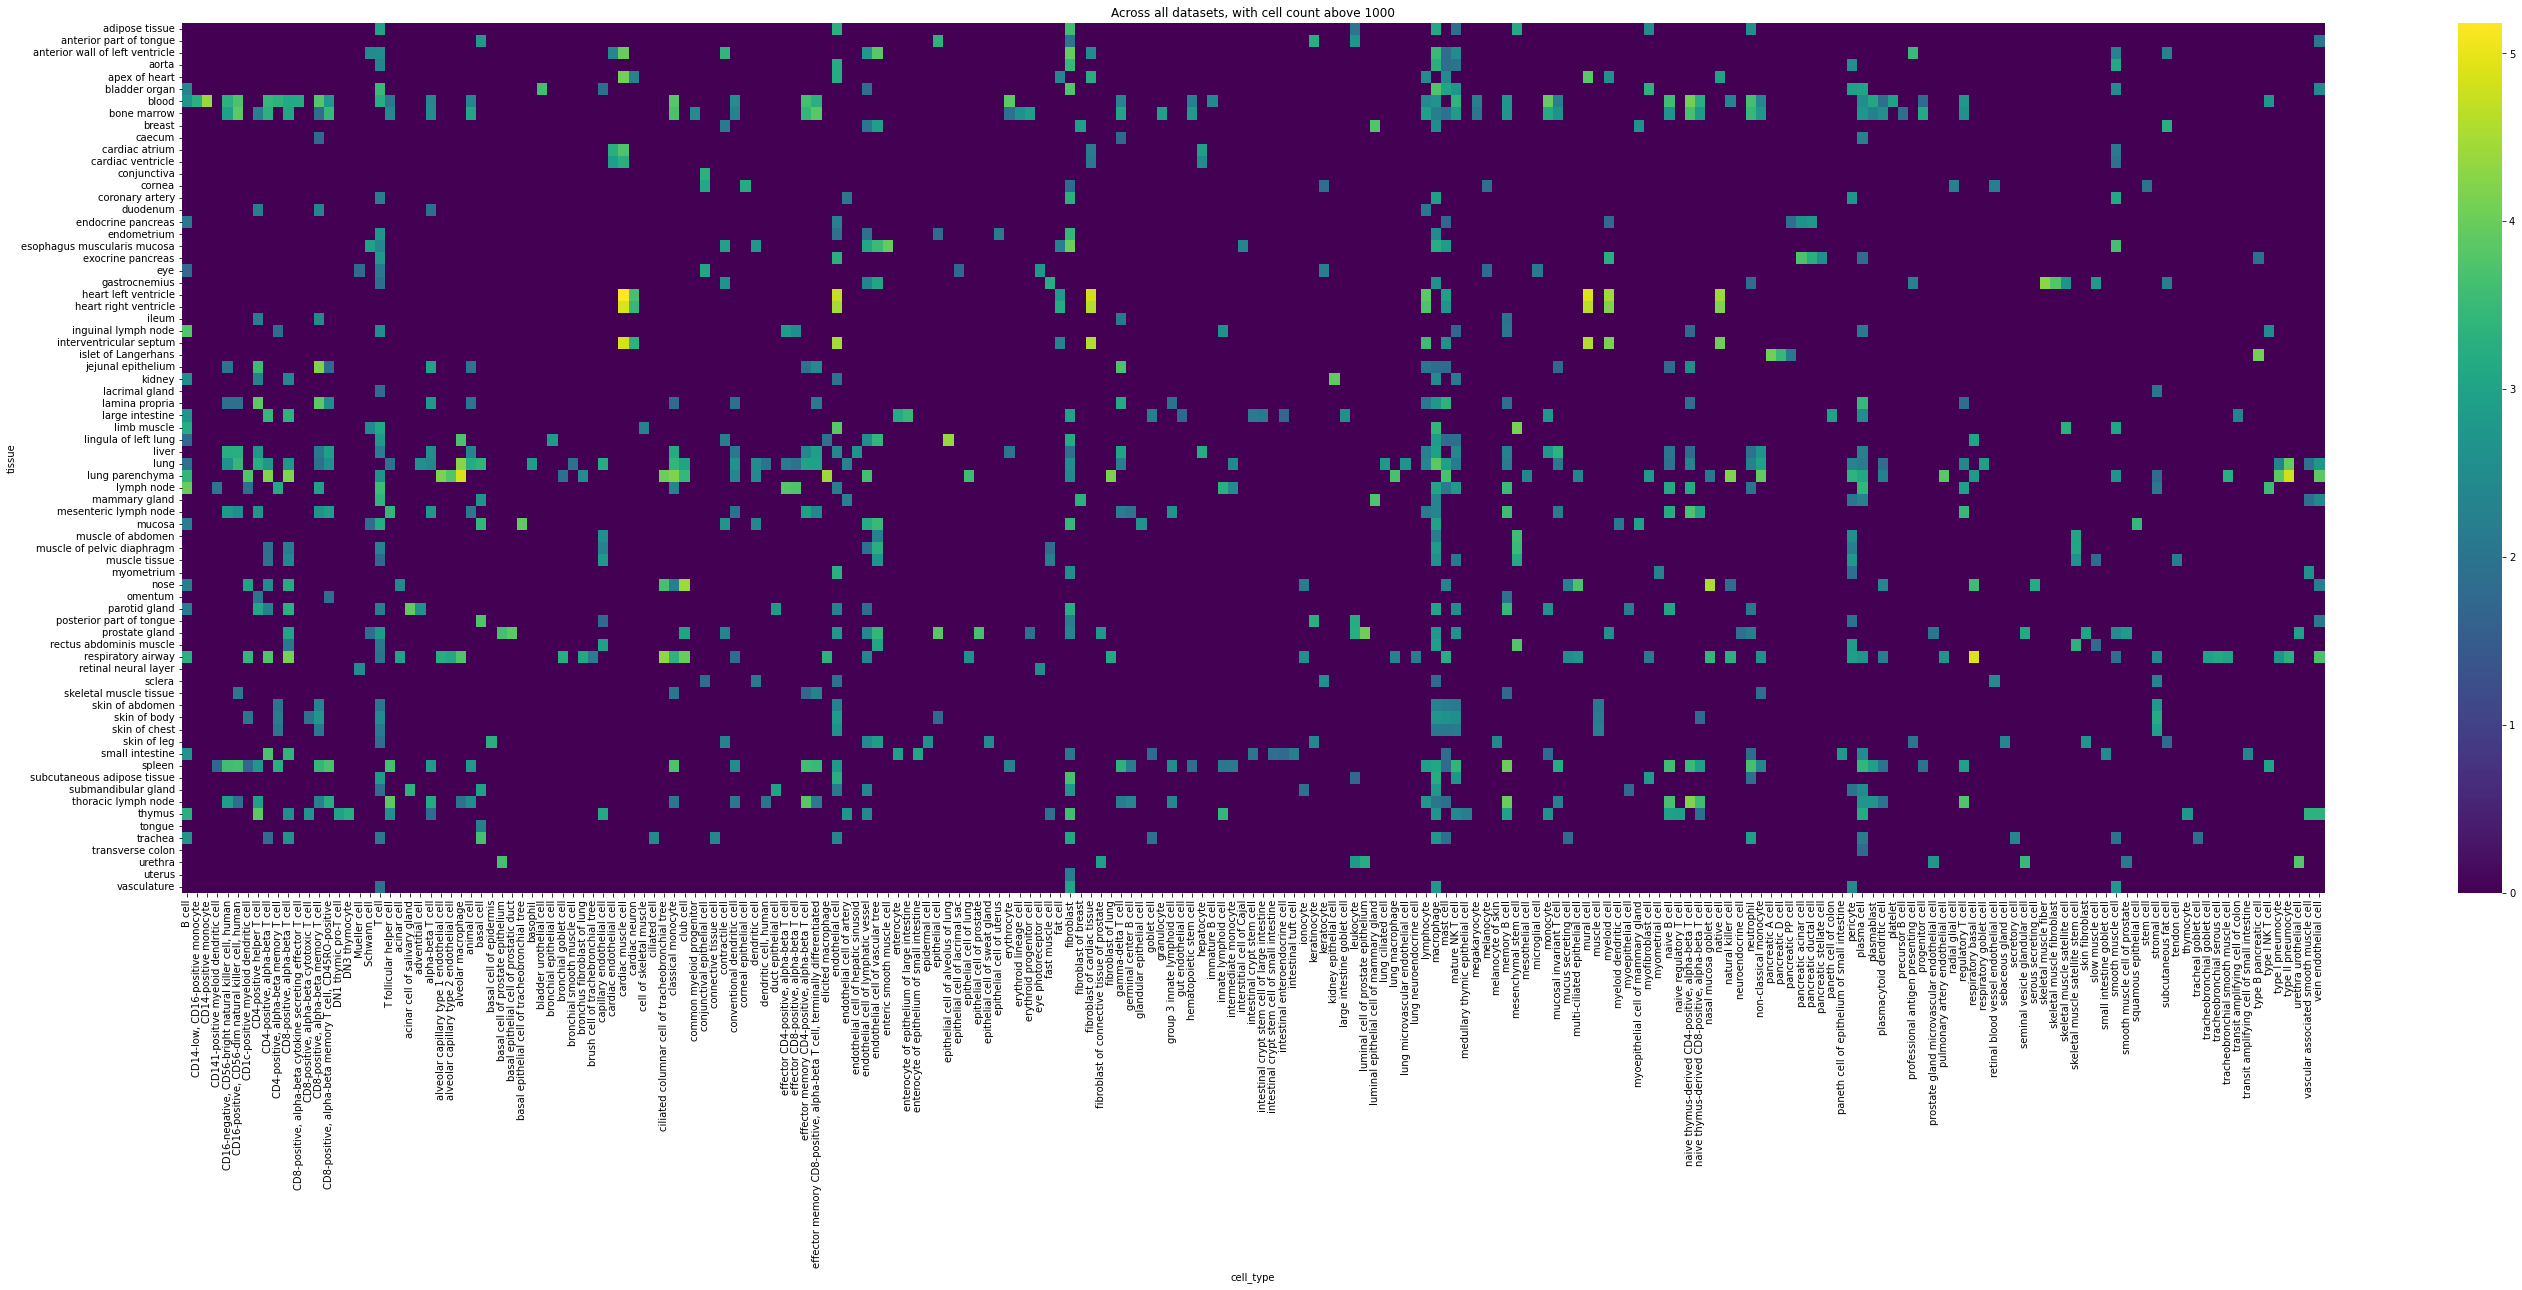

In [7]:
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.DataFrame({
    'tissue': ['urethra', 'prostate gland', 'urethra', 'prostate gland', 'urethra', 'prostate gland', 'urethra', 'prostate gland', 'urethra', 'prostate gland', 'urethra', 'prostate gland', 'urethra', 'prostate gland', 'urethra', 'prostate gland', 'islet of Langerhans', 'islet of Langerhans', 'islet of Langerhans', 'islet of Langerhans', 'cornea', 'blood', 'spleen', 'bone marrow', 'prostate gland', 'bone marrow', 'bone marrow', 'large intestine', 'aorta', 'cornea', 'uterus', 'adipose tissue', 'endometrium', 'myometrium', 'coronary artery', 'submandibular gland', 'parotid gland', 'lung', 'vasculature', 'liver', 'small intestine', 'subcutaneous adipose tissue', 'prostate gland', 'thymus', 'trachea', 'anterior part of tongue', 'posterior part of tongue', 'bladder organ', 'trachea', 'endometrium', 'skin of body', 'prostate gland', 'anterior part of tongue', 'submandibular gland', 'parotid gland', 'exocrine pancreas', 'lymph node', 'aorta', 'eye', 'adipose tissue', 'endometrium', 'skin of abdomen', 'inguinal lymph node', 'coronary artery', 'submandibular gland', 'lacrimal gland', 'parotid gland', 'skin of chest', 'mammary gland', 'vasculature', 'skin of body', 'liver', 'subcutaneous adipose tissue', 'prostate gland', 'rectus abdominis muscle', 'muscle tissue', 'trachea', 'muscle of pelvic diaphragm', 'bladder organ', 'bone marrow', 'endocrine pancreas', 'lymph node', 'aorta', 'skin of abdomen', 'skin of chest', 'skin of body', 'small intestine', 'trachea', 'bladder organ', 'endocrine pancreas', 'exocrine pancreas', 'lymph node', 'aorta', 'adipose tissue', 'endometrium', 'myometrium', 'skin of abdomen', 'submandibular gland', 'sclera', 'parotid gland', 'skin of chest', 'skin of body', 'spleen', 'liver', 'kidney', 'subcutaneous adipose tissue', 'prostate gland', 'trachea', 'eye', 'large intestine', 'adipose tissue', 'muscle of abdomen', 'rectus abdominis muscle', 'muscle tissue', 'muscle of pelvic diaphragm', 'cornea', 'eye', 'trachea', 'lung', 'prostate gland', 'large intestine', 'small intestine', 'trachea', 'exocrine pancreas', 'cardiac atrium', 'cardiac ventricle', 'liver', 'submandibular gland', 'parotid gland', 'adipose tissue', 'subcutaneous adipose tissue', 'bladder organ', 'skin of abdomen', 'skin of chest', 'skin of body', 'rectus abdominis muscle', 'muscle tissue', 'thymus', 'muscle tissue', 'muscle of pelvic diaphragm', 'aorta', 'coronary artery', 'vasculature', 'cardiac atrium', 'cardiac ventricle', 'prostate gland', 'trachea', 'bladder organ', 'blood', 'spleen', 'liver', 'bone marrow', 'blood', 'lymph node', 'blood', 'aorta', 'adipose tissue', 'endometrium', 'skin of abdomen', 'coronary artery', 'submandibular gland', 'sclera', 'parotid gland', 'skin of chest', 'mammary gland', 'lung', 'vasculature', 'skin of body', 'spleen', 'liver', 'kidney', 'subcutaneous adipose tissue', 'prostate gland', 'thymus', 'bone marrow', 'muscle of abdomen', 'rectus abdominis muscle', 'muscle tissue', 'trachea', 'muscle of pelvic diaphragm', 'bladder organ', 'endocrine pancreas', 'lymph node', 'large intestine', 'eye', 'inguinal lymph node', 'parotid gland', 'lung', 'small intestine', 'kidney', 'thymus', 'trachea', 'bladder organ', 'eye', 'retinal neural layer', 'anterior part of tongue', 'posterior part of tongue', 'trachea', 'myometrium', 'mammary gland', 'lung', 'thymus', 'muscle tissue', 'sclera', 'lung', 'parotid gland', 'kidney', 'thymus', 'lymph node', 'skin of abdomen', 'sclera', 'lacrimal gland', 'skin of chest', 'skin of body', 'cornea', 'large intestine', 'blood', 'parotid gland', 'liver', 'small intestine', 'thymus', 'bone marrow', 'large intestine', 'small intestine', 'large intestine', 'blood', 'parotid gland', 'lung', 'small intestine', 'bone marrow', 'muscle tissue', 'trachea', 'muscle of pelvic diaphragm', 'large intestine', 'blood', 'parotid gland', 'lung', 'small intestine', 'kidney', 'prostate gland', 'thymus', 'bone marrow', 'rectus abdominis muscle', 'muscle tissue', 'trachea', 'muscle of pelvic diaphragm', 'tongue', 'submandibular gland', 'mammary gland', 'lung', 'trachea', 'anterior part of tongue', 'posterior part of tongue', 'aorta', 'myometrium', 'coronary artery', 'submandibular gland', 'mammary gland', 'lung', 'vasculature', 'muscle of abdomen', 'rectus abdominis muscle', 'muscle tissue', 'muscle of pelvic diaphragm', 'posterior part of tongue', 'bladder organ', 'cornea', 'adipose tissue', 'subcutaneous adipose tissue', 'anterior part of tongue', 'posterior part of tongue', 'cardiac atrium', 'cardiac ventricle', 'endocrine pancreas', 'exocrine pancreas', 'prostate gland', 'lung', 'lymph node', 'blood', 'adipose tissue', 'parotid gland', 'lung', 'spleen', 'liver', 'small intestine', 'subcutaneous adipose tissue', 'bone marrow', 'trachea', 'exocrine pancreas', 'lymph node', 'large intestine', 'blood', 'inguinal lymph node', 'submandibular gland', 'mammary gland', 'lung', 'spleen', 'small intestine', 'thymus', 'bone marrow', 'trachea', 'bladder organ', 'lymph node', 'blood', 'inguinal lymph node', 'parotid gland', 'spleen', 'thymus', 'bone marrow', 'lymph node', 'blood', 'parotid gland', 'spleen', 'thymus', 'bone marrow', 'skin of body', 'thymus', 'thymus', 'lymph node', 'blood', 'aorta', 'adipose tissue', 'skin of abdomen', 'inguinal lymph node', 'parotid gland', 'skin of chest', 'lung', 'skin of body', 'spleen', 'liver', 'kidney', 'subcutaneous adipose tissue', 'prostate gland', 'thymus', 'bone marrow', 'muscle tissue', 'bladder organ', 'lymph node', 'spleen', 'lymph node', 'blood', 'lung', 'spleen', 'lung', 'thymus', 'thymus', 'lymph node', 'blood', 'inguinal lymph node', 'spleen', 'lymph node', 'blood', 'skin of abdomen', 'inguinal lymph node', 'skin of chest', 'skin of body', 'spleen', 'skin of body', 'spleen', 'blood', 'lymph node', 'skin of abdomen', 'skin of chest', 'skin of body', 'spleen', 'lymph node', 'blood', 'inguinal lymph node', 'spleen', 'lymph node', 'inguinal lymph node', 'lung', 'lymph node', 'inguinal lymph node', 'lung', 'lymph node', 'inguinal lymph node', 'spleen', 'thymus', 'thymus', 'lung', 'lung', 'endocrine pancreas', 'exocrine pancreas', 'large intestine', 'endocrine pancreas', 'exocrine pancreas', 'endometrium', 'submandibular gland', 'parotid gland', 'thymus', 'muscle of pelvic diaphragm', 'bladder organ', 'muscle of abdomen', 'rectus abdominis muscle', 'muscle tissue', 'muscle of pelvic diaphragm', 'lung', 'thymus', 'muscle of abdomen', 'rectus abdominis muscle', 'muscle tissue', 'muscle of pelvic diaphragm', 'posterior part of tongue', 'bladder organ', 'endometrium', 'large intestine', 'small intestine', 'endocrine pancreas', 'trachea', 'mammary gland', 'prostate gland', 'prostate gland', 'cornea', 'eye', 'sclera', 'thymus', 'myometrium', 'lung', 'lymph node', 'lung', 'spleen', 'lymph node', 'spleen', 'lymph node', 'skin of body', 'spleen', 'exocrine pancreas', 'parotid gland', 'lung', 'kidney', 'mammary gland', 'lung', 'thymus', 'anterior part of tongue', 'posterior part of tongue', 'bladder organ', 'cardiac atrium', 'cardiac ventricle', 'cornea', 'sclera', 'lung', 'submandibular gland', 'parotid gland', 'thymus', 'submandibular gland', 'muscle of abdomen', 'rectus abdominis muscle', 'muscle tissue', 'muscle of pelvic diaphragm', 'large intestine', 'large intestine', 'small intestine', 'large intestine', 'small intestine', 'cardiac atrium', 'cardiac ventricle', 'small intestine', 'lung', 'large intestine', 'trachea', 'small intestine', 'small intestine', 'liver', 'coronary artery', 'mammary gland', 'lung', 'thymus', 'cornea', 'eye', 'sclera', 'conjunctiva', 'eye', 'small intestine', 'bladder organ', 'large intestine', 'small intestine', 'lung', 'mammary gland', 'eye', 'retinal neural layer', 'limb muscle', 'limb muscle', 'limb muscle', 'limb muscle', 'limb muscle', 'limb muscle', 'limb muscle', 'limb muscle', 'limb muscle', 'lung parenchyma', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'nose', 'respiratory airway', 'lung parenchyma', 'nose', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'nose', 'respiratory airway', 'lung parenchyma', 'nose', 'nose', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'nose', 'respiratory airway', 'nose', 'respiratory airway', 'lung parenchyma', 'nose', 'respiratory airway', 'lung parenchyma', 'nose', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'nose', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'nose', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'respiratory airway', 'lung parenchyma', 'nose', 'respiratory airway', 'lung parenchyma', 'nose', 'respiratory airway', 'lung parenchyma', 'nose', 'respiratory airway', 'lung parenchyma', 'nose', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'nose', 'respiratory airway', 'lung parenchyma', 'nose', 'respiratory airway', 'nose', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'respiratory airway', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'heart right ventricle', 'heart left ventricle', 'interventricular septum', 'apex of heart', 'heart right ventricle', 'heart left ventricle', 'interventricular septum', 'apex of heart', 'heart right ventricle', 'heart left ventricle', 'interventricular septum', 'apex of heart', 'heart right ventricle', 'heart left ventricle', 'interventricular septum', 'apex of heart', 'heart right ventricle', 'heart left ventricle', 'interventricular septum', 'apex of heart', 'heart right ventricle', 'heart left ventricle', 'interventricular septum', 'apex of heart', 'heart right ventricle', 'heart left ventricle', 'interventricular septum', 'apex of heart', 'heart right ventricle', 'heart left ventricle', 'interventricular septum', 'apex of heart', 'heart right ventricle', 'heart left ventricle', 'interventricular septum', 'apex of heart', 'heart right ventricle', 'heart left ventricle', 'interventricular septum', 'apex of heart', 'mucosa', 'esophagus muscularis mucosa', 'lingula of left lung', 'anterior wall of left ventricle', 'mucosa', 'mucosa', 'gastrocnemius', 'skin of leg', 'prostate gland', 'esophagus muscularis mucosa', 'lingula of left lung', 'anterior wall of left ventricle', 'esophagus muscularis mucosa', 'lingula of left lung', 'anterior wall of left ventricle', 'esophagus muscularis mucosa', 'gastrocnemius', 'skin of leg', 'anterior wall of left ventricle', 'mucosa', 'prostate gland', 'breast', 'mucosa', 'gastrocnemius', 'skin of leg', 'prostate gland', 'esophagus muscularis mucosa', 'lingula of left lung', 'anterior wall of left ventricle', 'gastrocnemius', 'gastrocnemius', 'esophagus muscularis mucosa', 'anterior wall of left ventricle', 'breast', 'mucosa', 'gastrocnemius', 'prostate gland', 'esophagus muscularis mucosa', 'lingula of left lung', 'anterior wall of left ventricle', 'mucosa', 'lingula of left lung', 'skin of leg', 'skin of leg', 'mucosa', 'esophagus muscularis mucosa', 'lingula of left lung', 'gastrocnemius', 'mucosa', 'anterior wall of left ventricle', 'gastrocnemius', 'prostate gland', 'mucosa', 'lingula of left lung', 'anterior wall of left ventricle', 'lingula of left lung', 'esophagus muscularis mucosa', 'breast', 'mucosa', 'gastrocnemius', 'skin of leg', 'prostate gland', 'esophagus muscularis mucosa', 'lingula of left lung', 'anterior wall of left ventricle', 'breast', 'mucosa', 'gastrocnemius', 'skin of leg', 'prostate gland', 'esophagus muscularis mucosa', 'lingula of left lung', 'anterior wall of left ventricle', 'skin of leg', 'prostate gland', 'prostate gland', 'breast', 'mucosa', 'breast', 'lingula of left lung', 'mucosa', 'prostate gland', 'esophagus muscularis mucosa', 'breast', 'gastrocnemius', 'skin of leg', 'anterior wall of left ventricle', 'anterior wall of left ventricle', 'mucosa', 'prostate gland', 'esophagus muscularis mucosa', 'anterior wall of left ventricle', 'skin of leg', 'prostate gland', 'lingula of left lung', 'gastrocnemius', 'lingula of left lung', 'anterior wall of left ventricle', 'gastrocnemius', 'skin of leg', 'skin of leg', 'prostate gland', 'skin of leg', 'breast', 'prostate gland', 'urethra', 'prostate gland', 'urethra', 'blood', 'bone marrow', 'jejunal epithelium', 'lamina propria', 'liver', 'lung', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'blood', 'bone marrow', 'lamina propria', 'liver', 'lung', 'mesenteric lymph node', 'skeletal muscle tissue', 'spleen', 'thoracic lymph node', 'bone marrow', 'duodenum', 'ileum', 'jejunal epithelium', 'lamina propria', 'liver', 'lung', 'mesenteric lymph node', 'omentum', 'spleen', 'thoracic lymph node', 'bone marrow', 'caecum', 'duodenum', 'ileum', 'jejunal epithelium', 'lamina propria', 'liver', 'lung', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'blood', 'bone marrow', 'jejunal epithelium', 'lamina propria', 'liver', 'lung', 'mesenteric lymph node', 'omentum', 'spleen', 'thoracic lymph node', 'blood', 'bone marrow', 'lung', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'blood', 'bone marrow', 'duodenum', 'jejunal epithelium', 'lamina propria', 'liver', 'lung', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'thymus', 'lung', 'thoracic lymph node', 'blood', 'bone marrow', 'jejunal epithelium', 'lamina propria', 'liver', 'lung', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'blood', 'bone marrow', 'lamina propria', 'liver', 'lung', 'skeletal muscle tissue', 'spleen', 'thoracic lymph node', 'blood', 'bone marrow', 'lamina propria', 'liver', 'lung', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'lung', 'thoracic lymph node', 'blood', 'bone marrow', 'jejunal epithelium', 'liver', 'lung', 'mesenteric lymph node', 'skeletal muscle tissue', 'spleen', 'thoracic lymph node', 'blood', 'bone marrow', 'jejunal epithelium', 'lamina propria', 'liver', 'lung', 'mesenteric lymph node', 'skeletal muscle tissue', 'spleen', 'thoracic lymph node', 'bone marrow', 'bone marrow', 'caecum', 'ileum', 'jejunal epithelium', 'lamina propria', 'liver', 'lung', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'lamina propria', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'blood', 'bone marrow', 'duodenum', 'jejunal epithelium', 'lamina propria', 'liver', 'lung', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'bone marrow', 'jejunal epithelium', 'lamina propria', 'liver', 'lung', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'bone marrow', 'jejunal epithelium', 'lamina propria', 'lung', 'spleen', 'thoracic lymph node', 'blood', 'bone marrow', 'blood', 'bone marrow', 'ileum', 'lamina propria', 'liver', 'lung', 'mesenteric lymph node', 'omentum', 'skeletal muscle tissue', 'spleen', 'thoracic lymph node', 'thymus', 'blood', 'bone marrow', 'jejunal epithelium', 'liver', 'lung', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'blood', 'bone marrow', 'jejunal epithelium', 'liver', 'lung', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'blood', 'bone marrow', 'jejunal epithelium', 'lamina propria', 'liver', 'lung', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'blood', 'bone marrow', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'thymus', 'blood', 'bone marrow', 'liver', 'lung', 'skeletal muscle tissue', 'spleen', 'blood', 'bone marrow', 'caecum', 'lamina propria', 'liver', 'spleen', 'thoracic lymph node', 'transverse colon', 'bone marrow', 'spleen', 'thoracic lymph node', 'bone marrow', 'lung', 'spleen', 'thoracic lymph node', 'bone marrow', 'blood', 'bone marrow', 'spleen', 'blood', 'bone marrow', 'lamina propria', 'lung', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood'],

    'cell_type': ['leukocyte', 'leukocyte', 'luminal cell of prostate epithelium', 'luminal cell of prostate epithelium', 'basal cell of prostate epithelium', 'basal cell of prostate epithelium', 'fibroblast of connective tissue of prostate', 'fibroblast of connective tissue of prostate', 'smooth muscle cell of prostate', 'smooth muscle cell of prostate', 'urethra urothelial cell', 'urethra urothelial cell', 'seminal vesicle glandular cell', 'seminal vesicle glandular cell', 'prostate gland microvascular endothelial cell', 'prostate gland microvascular endothelial cell', 'type B pancreatic cell', 'pancreatic A cell', 'pancreatic D cell', 'pancreatic PP cell', 'stem cell', 'hematopoietic stem cell', 'hematopoietic stem cell', 'hematopoietic stem cell', 'erythroid progenitor cell', 'erythroid progenitor cell', 'common myeloid progenitor', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'ciliated cell', 'epithelial cell', 'epithelial cell', 'epithelial cell', 'epithelial cell', 'duct epithelial cell', 'duct epithelial cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'granulocyte', 'mast cell', 'mast cell', 'mast cell', 'mast cell', 'mast cell', 'mast cell', 'mast cell', 'mast cell', 'mast cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'microglial cell', 'gut endothelial cell', 'mesenchymal stem cell', 'mesenchymal stem cell', 'mesenchymal stem cell', 'mesenchymal stem cell', 'mesenchymal stem cell', 'melanocyte', 'melanocyte', 'secretory cell', 'club cell', 'club cell', 'goblet cell', 'goblet cell', 'goblet cell', 'type B pancreatic cell', 'hepatocyte', 'hepatocyte', 'hepatocyte', 'myoepithelial cell', 'myoepithelial cell', 'myofibroblast cell', 'myofibroblast cell', 'myofibroblast cell', 'muscle cell', 'muscle cell', 'muscle cell', 'slow muscle cell', 'slow muscle cell', 'fast muscle cell', 'fast muscle cell', 'fast muscle cell', 'smooth muscle cell', 'smooth muscle cell', 'smooth muscle cell', 'smooth muscle cell', 'smooth muscle cell', 'smooth muscle cell', 'smooth muscle cell', 'smooth muscle cell', 'erythrocyte', 'erythrocyte', 'erythrocyte', 'erythrocyte', 'platelet', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'B cell', 'B cell', 'B cell', 'B cell', 'B cell', 'B cell', 'B cell', 'B cell', 'B cell', 'B cell', 'B cell', 'B cell', 'eye photoreceptor cell', 'eye photoreceptor cell', 'keratinocyte', 'keratinocyte', 'mucus secreting cell', 'vascular associated smooth muscle cell', 'vascular associated smooth muscle cell', 'vascular associated smooth muscle cell', 'vascular associated smooth muscle cell', 'tendon cell', 'dendritic cell', 'dendritic cell', 'CD4-positive helper T cell', 'CD4-positive helper T cell', 'CD4-positive helper T cell', 'stromal cell', 'stromal cell', 'stromal cell', 'stromal cell', 'stromal cell', 'stromal cell', 'corneal epithelial cell', 'monocyte', 'monocyte', 'monocyte', 'monocyte', 'monocyte', 'monocyte', 'monocyte', 'enterocyte', 'enterocyte', 'CD4-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'basal cell', 'basal cell', 'basal cell', 'basal cell', 'basal cell', 'basal cell', 'basal cell', 'pericyte', 'pericyte', 'pericyte', 'pericyte', 'pericyte', 'pericyte', 'pericyte', 'pericyte', 'pericyte', 'pericyte', 'pericyte', 'pericyte', 'pericyte', 'radial glial cell', 'leukocyte', 'leukocyte', 'leukocyte', 'leukocyte', 'cardiac muscle cell', 'cardiac muscle cell', 'myeloid cell', 'myeloid cell', 'myeloid cell', 'basophil', 'neutrophil', 'neutrophil', 'neutrophil', 'neutrophil', 'neutrophil', 'neutrophil', 'neutrophil', 'neutrophil', 'neutrophil', 'neutrophil', 'neutrophil', 'plasma cell', 'plasma cell', 'plasma cell', 'plasma cell', 'plasma cell', 'plasma cell', 'plasma cell', 'plasma cell', 'plasma cell', 'plasma cell', 'plasma cell', 'plasma cell', 'plasma cell', 'plasma cell', 'memory B cell', 'memory B cell', 'memory B cell', 'memory B cell', 'memory B cell', 'memory B cell', 'memory B cell', 'naive B cell', 'naive B cell', 'naive B cell', 'naive B cell', 'naive B cell', 'naive B cell', 'CD8-positive, alpha-beta cytotoxic T cell', 'CD8-positive, alpha-beta cytotoxic T cell', 'DN3 thymocyte', 'mature NK T cell', 'mature NK T cell', 'mature NK T cell', 'mature NK T cell', 'mature NK T cell', 'mature NK T cell', 'mature NK T cell', 'mature NK T cell', 'mature NK T cell', 'mature NK T cell', 'mature NK T cell', 'mature NK T cell', 'mature NK T cell', 'mature NK T cell', 'mature NK T cell', 'mature NK T cell', 'mature NK T cell', 'mature NK T cell', 'mature NK T cell', 'regulatory T cell', 'regulatory T cell', 'classical monocyte', 'classical monocyte', 'classical monocyte', 'classical monocyte', 'non-classical monocyte', 'thymocyte', 'DN1 thymic pro-T cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'CD4-positive, alpha-beta memory T cell', 'CD4-positive, alpha-beta memory T cell', 'CD4-positive, alpha-beta memory T cell', 'CD4-positive, alpha-beta memory T cell', 'CD4-positive, alpha-beta memory T cell', 'CD4-positive, alpha-beta memory T cell', 'CD4-positive, alpha-beta memory T cell', 'naive thymus-derived CD8-positive, alpha-beta T cell', 'naive thymus-derived CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta cytokine secreting effector T cell', 'CD8-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta memory T cell', 'type I NK T cell', 'type I NK T cell', 'type I NK T cell', 'type I NK T cell', 'effector CD4-positive, alpha-beta T cell', 'effector CD4-positive, alpha-beta T cell', 'effector CD4-positive, alpha-beta T cell', 'effector CD8-positive, alpha-beta T cell', 'effector CD8-positive, alpha-beta T cell', 'effector CD8-positive, alpha-beta T cell', 'innate lymphoid cell', 'innate lymphoid cell', 'innate lymphoid cell', 'innate lymphoid cell', 'T follicular helper cell', 'type I pneumocyte', 'type II pneumocyte', 'pancreatic acinar cell', 'pancreatic acinar cell', 'enterocyte of epithelium of large intestine', 'pancreatic ductal cell', 'pancreatic ductal cell', 'endothelial cell of lymphatic vessel', 'endothelial cell of lymphatic vessel', 'endothelial cell of lymphatic vessel', 'endothelial cell of lymphatic vessel', 'endothelial cell of lymphatic vessel', 'endothelial cell of lymphatic vessel', 'endothelial cell of vascular tree', 'endothelial cell of vascular tree', 'endothelial cell of vascular tree', 'endothelial cell of vascular tree', 'capillary endothelial cell', 'capillary endothelial cell', 'capillary endothelial cell', 'capillary endothelial cell', 'capillary endothelial cell', 'capillary endothelial cell', 'capillary endothelial cell', 'capillary endothelial cell', 'epithelial cell of uterus', 'intestinal crypt stem cell', 'intestinal crypt stem cell', 'pancreatic PP cell', 'connective tissue cell', 'luminal epithelial cell of mammary gland', 'luminal cell of prostate epithelium', 'basal cell of prostate epithelium', 'keratocyte', 'keratocyte', 'keratocyte', 'medullary thymic epithelial cell', 'myometrial cell', 'respiratory goblet cell', 'intermediate monocyte', 'intermediate monocyte', 'intermediate monocyte', 'CD141-positive myeloid dendritic cell', 'CD141-positive myeloid dendritic cell', 'CD1c-positive myeloid dendritic cell', 'CD1c-positive myeloid dendritic cell', 'CD1c-positive myeloid dendritic cell', 'pancreatic stellate cell', 'adventitial cell', 'adventitial cell', 'kidney epithelial cell', 'vein endothelial cell', 'vein endothelial cell', 'vein endothelial cell', 'vein endothelial cell', 'vein endothelial cell', 'vein endothelial cell', 'fibroblast of cardiac tissue', 'fibroblast of cardiac tissue', 'retinal blood vessel endothelial cell', 'retinal blood vessel endothelial cell', 'bronchial smooth muscle cell', 'acinar cell of salivary gland', 'acinar cell of salivary gland', 'naive regulatory T cell', 'ionocyte', 'skeletal muscle satellite stem cell', 'skeletal muscle satellite stem cell', 'skeletal muscle satellite stem cell', 'skeletal muscle satellite stem cell', 'paneth cell of colon', 'transit amplifying cell of colon', 'transit amplifying cell of small intestine', 'intestinal crypt stem cell of large intestine', 'intestinal crypt stem cell of small intestine', 'cardiac endothelial cell', 'cardiac endothelial cell', 'intestinal tuft cell', 'lung ciliated cell', 'large intestine goblet cell', 'tracheal goblet cell', 'enterocyte of epithelium of small intestine', 'paneth cell of epithelium of small intestine', 'endothelial cell of hepatic sinusoid', 'endothelial cell of artery', 'endothelial cell of artery', 'endothelial cell of artery', 'endothelial cell of artery', 'conjunctival epithelial cell', 'conjunctival epithelial cell', 'conjunctival epithelial cell', 'conjunctival epithelial cell', 'epithelial cell of lacrimal sac', 'small intestine goblet cell', 'bladder urothelial cell', 'intestinal enteroendocrine cell', 'intestinal enteroendocrine cell', 'lung microvascular endothelial cell', 'fibroblast of breast', 'Mueller cell', 'Mueller cell', 'T cell', 'endothelial cell', 'mesenchymal stem cell', 'cell of skeletal muscle', 'smooth muscle cell', 'macrophage', 'B cell', 'skeletal muscle satellite cell', 'Schwann cell', 'fibroblast', 'mesothelial cell', 'epithelial cell of lung', 'epithelial cell of lung', 'T cell', 'T cell', 'mast cell', 'mast cell', 'mast cell', 'club cell', 'club cell', 'club cell', 'myofibroblast cell', 'myofibroblast cell', 'smooth muscle cell', 'smooth muscle cell', 'B cell', 'B cell', 'B cell', 'serous secreting cell', 'mucus secreting cell', 'mucus secreting cell', 'dendritic cell', 'stromal cell', 'stromal cell', 'alveolar macrophage', 'alveolar macrophage', 'acinar cell', 'acinar cell', 'natural killer cell', 'natural killer cell', 'natural killer cell', 'CD4-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'pericyte', 'pericyte', 'plasmacytoid dendritic cell', 'plasmacytoid dendritic cell', 'plasmacytoid dendritic cell', 'plasma cell', 'plasma cell', 'classical monocyte', 'classical monocyte', 'classical monocyte', 'elicited macrophage', 'elicited macrophage', 'non-classical monocyte', 'non-classical monocyte', 'conventional dendritic cell', 'conventional dendritic cell', 'type I pneumocyte', 'type I pneumocyte', 'type II pneumocyte', 'type II pneumocyte', 'brush cell of trachebronchial tree', 'endothelial cell of lymphatic vessel', 'endothelial cell of lymphatic vessel', 'ciliated columnar cell of tracheobronchial tree', 'ciliated columnar cell of tracheobronchial tree', 'ciliated columnar cell of tracheobronchial tree', 'CD1c-positive myeloid dendritic cell', 'CD1c-positive myeloid dendritic cell', 'CD1c-positive myeloid dendritic cell', 'nasal mucosa goblet cell', 'nasal mucosa goblet cell', 'nasal mucosa goblet cell', 'vein endothelial cell', 'vein endothelial cell', 'vein endothelial cell', 'fibroblast of lung', 'fibroblast of lung', 'respiratory basal cell', 'respiratory basal cell', 'respiratory basal cell', 'ionocyte', 'ionocyte', 'multi-ciliated epithelial cell', 'multi-ciliated epithelial cell', 'multi-ciliated epithelial cell', 'tracheobronchial serous cell', 'tracheobronchial goblet cell', 'tracheobronchial smooth muscle cell', 'tracheobronchial smooth muscle cell', 'lung neuroendocrine cell', 'bronchial goblet cell', 'bronchial goblet cell', 'pulmonary artery endothelial cell', 'pulmonary artery endothelial cell', 'lung macrophage', 'lung macrophage', 'bronchus fibroblast of lung', 'bronchus fibroblast of lung', 'alveolar capillary type 2 endothelial cell', 'alveolar capillary type 2 endothelial cell', 'alveolar capillary type 1 endothelial cell', 'alveolar capillary type 1 endothelial cell', 'mast cell', 'mast cell', 'mast cell', 'mast cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'fat cell', 'fat cell', 'fat cell', 'fat cell', 'lymphocyte', 'lymphocyte', 'lymphocyte', 'lymphocyte', 'cardiac muscle cell', 'cardiac muscle cell', 'cardiac muscle cell', 'cardiac muscle cell', 'myeloid cell', 'myeloid cell', 'myeloid cell', 'myeloid cell', 'fibroblast of cardiac tissue', 'fibroblast of cardiac tissue', 'fibroblast of cardiac tissue', 'fibroblast of cardiac tissue', 'mural cell', 'mural cell', 'mural cell', 'mural cell', 'cardiac neuron', 'cardiac neuron', 'cardiac neuron', 'cardiac neuron', 'native cell', 'native cell', 'native cell', 'native cell', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'squamous epithelial cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'T cell', 'mast cell', 'mast cell', 'mast cell', 'fat cell', 'professional antigen presenting cell', 'professional antigen presenting cell', 'professional antigen presenting cell', 'glandular epithelial cell', 'neuroendocrine cell', 'contractile cell', 'contractile cell', 'contractile cell', 'contractile cell', 'contractile cell', 'contractile cell', 'contractile cell', 'contractile cell', 'slow muscle cell', 'fast muscle cell', 'smooth muscle cell', 'smooth muscle cell', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'B cell', 'B cell', 'keratinocyte', 'epidermal cell', 'dendritic cell', 'dendritic cell', 'alveolar macrophage', 'skeletal muscle satellite cell', 'basal cell', 'cardiac muscle cell', 'neutrophil', 'neutrophil', 'myeloid dendritic cell', 'mature NK T cell', 'mature NK T cell', 'elicited macrophage', 'interstitial cell of Cajal', 'endothelial cell of lymphatic vessel', 'endothelial cell of lymphatic vessel', 'endothelial cell of lymphatic vessel', 'endothelial cell of lymphatic vessel', 'endothelial cell of lymphatic vessel', 'endothelial cell of lymphatic vessel', 'endothelial cell of lymphatic vessel', 'endothelial cell of lymphatic vessel', 'endothelial cell of vascular tree', 'endothelial cell of vascular tree', 'endothelial cell of vascular tree', 'endothelial cell of vascular tree', 'endothelial cell of vascular tree', 'endothelial cell of vascular tree', 'endothelial cell of vascular tree', 'endothelial cell of vascular tree', 'basal cell of epidermis', 'epithelial cell of prostate', 'basal epithelial cell of prostatic duct', 'myoepithelial cell of mammary gland', 'myoepithelial cell of mammary gland', 'luminal epithelial cell of mammary gland', 'bronchial epithelial cell', 'basal epithelial cell of tracheobronchial tree', 'luminal cell of prostate epithelium', 'enteric smooth muscle cell', 'subcutaneous fat cell', 'subcutaneous fat cell', 'subcutaneous fat cell', 'subcutaneous fat cell', 'fibroblast of cardiac tissue', 'Schwann cell', 'Schwann cell', 'Schwann cell', 'Schwann cell', 'skin fibroblast', 'skin fibroblast', 'respiratory basal cell', 'skeletal muscle fiber', 'epithelial cell of alveolus of lung', 'cardiac endothelial cell', 'skeletal muscle fibroblast', 'epithelial cell of sweat gland', 'melanocyte of skin', 'smooth muscle cell of prostate', 'sebaceous gland cell', 'fibroblast of breast', 'fibroblast of connective tissue of prostate', 'fibroblast of connective tissue of prostate', 'smooth muscle cell of prostate', 'smooth muscle cell of prostate', 'CD16-negative, CD56-bright natural killer cell, human', 'CD16-negative, CD56-bright natural killer cell, human', 'CD16-negative, CD56-bright natural killer cell, human', 'CD16-negative, CD56-bright natural killer cell, human', 'CD16-negative, CD56-bright natural killer cell, human', 'CD16-negative, CD56-bright natural killer cell, human', 'CD16-negative, CD56-bright natural killer cell, human', 'CD16-negative, CD56-bright natural killer cell, human', 'CD16-negative, CD56-bright natural killer cell, human', 'CD16-positive, CD56-dim natural killer cell, human', 'CD16-positive, CD56-dim natural killer cell, human', 'CD16-positive, CD56-dim natural killer cell, human', 'CD16-positive, CD56-dim natural killer cell, human', 'CD16-positive, CD56-dim natural killer cell, human', 'CD16-positive, CD56-dim natural killer cell, human', 'CD16-positive, CD56-dim natural killer cell, human', 'CD16-positive, CD56-dim natural killer cell, human', 'CD16-positive, CD56-dim natural killer cell, human', 'CD4-positive helper T cell', 'CD4-positive helper T cell', 'CD4-positive helper T cell', 'CD4-positive helper T cell', 'CD4-positive helper T cell', 'CD4-positive helper T cell', 'CD4-positive helper T cell', 'CD4-positive helper T cell', 'CD4-positive helper T cell', 'CD4-positive helper T cell', 'CD4-positive helper T cell', 'CD8-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta memory T cell, CD45RO-positive', 'CD8-positive, alpha-beta memory T cell, CD45RO-positive', 'CD8-positive, alpha-beta memory T cell, CD45RO-positive', 'CD8-positive, alpha-beta memory T cell, CD45RO-positive', 'CD8-positive, alpha-beta memory T cell, CD45RO-positive', 'CD8-positive, alpha-beta memory T cell, CD45RO-positive', 'CD8-positive, alpha-beta memory T cell, CD45RO-positive', 'CD8-positive, alpha-beta memory T cell, CD45RO-positive', 'CD8-positive, alpha-beta memory T cell, CD45RO-positive', 'CD8-positive, alpha-beta memory T cell, CD45RO-positive', 'T follicular helper cell', 'T follicular helper cell', 'T follicular helper cell', 'T follicular helper cell', 'T follicular helper cell', 'T follicular helper cell', 'alpha-beta T cell', 'alpha-beta T cell', 'alpha-beta T cell', 'alpha-beta T cell', 'alpha-beta T cell', 'alpha-beta T cell', 'alpha-beta T cell', 'alpha-beta T cell', 'alpha-beta T cell', 'alpha-beta T cell', 'alpha-beta T cell', 'alveolar macrophage', 'alveolar macrophage', 'animal cell', 'animal cell', 'animal cell', 'animal cell', 'animal cell', 'animal cell', 'animal cell', 'animal cell', 'animal cell', 'classical monocyte', 'classical monocyte', 'classical monocyte', 'classical monocyte', 'classical monocyte', 'classical monocyte', 'classical monocyte', 'classical monocyte', 'conventional dendritic cell', 'conventional dendritic cell', 'conventional dendritic cell', 'conventional dendritic cell', 'conventional dendritic cell', 'conventional dendritic cell', 'conventional dendritic cell', 'conventional dendritic cell', 'dendritic cell, human', 'dendritic cell, human', 'effector memory CD4-positive, alpha-beta T cell', 'effector memory CD4-positive, alpha-beta T cell', 'effector memory CD4-positive, alpha-beta T cell', 'effector memory CD4-positive, alpha-beta T cell', 'effector memory CD4-positive, alpha-beta T cell', 'effector memory CD4-positive, alpha-beta T cell', 'effector memory CD4-positive, alpha-beta T cell', 'effector memory CD4-positive, alpha-beta T cell', 'effector memory CD4-positive, alpha-beta T cell', 'effector memory CD8-positive, alpha-beta T cell, terminally differentiated', 'effector memory CD8-positive, alpha-beta T cell, terminally differentiated', 'effector memory CD8-positive, alpha-beta T cell, terminally differentiated', 'effector memory CD8-positive, alpha-beta T cell, terminally differentiated', 'effector memory CD8-positive, alpha-beta T cell, terminally differentiated', 'effector memory CD8-positive, alpha-beta T cell, terminally differentiated', 'effector memory CD8-positive, alpha-beta T cell, terminally differentiated', 'effector memory CD8-positive, alpha-beta T cell, terminally differentiated', 'effector memory CD8-positive, alpha-beta T cell, terminally differentiated', 'effector memory CD8-positive, alpha-beta T cell, terminally differentiated', 'erythroid lineage cell', 'gamma-delta T cell', 'gamma-delta T cell', 'gamma-delta T cell', 'gamma-delta T cell', 'gamma-delta T cell', 'gamma-delta T cell', 'gamma-delta T cell', 'gamma-delta T cell', 'gamma-delta T cell', 'gamma-delta T cell', 'germinal center B cell', 'germinal center B cell', 'germinal center B cell', 'group 3 innate lymphoid cell', 'group 3 innate lymphoid cell', 'group 3 innate lymphoid cell', 'group 3 innate lymphoid cell', 'lymphocyte', 'lymphocyte', 'lymphocyte', 'lymphocyte', 'lymphocyte', 'lymphocyte', 'lymphocyte', 'lymphocyte', 'lymphocyte', 'lymphocyte', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'mast cell', 'mast cell', 'mast cell', 'mast cell', 'mast cell', 'mast cell', 'megakaryocyte', 'megakaryocyte', 'memory B cell', 'memory B cell', 'memory B cell', 'memory B cell', 'memory B cell', 'memory B cell', 'memory B cell', 'memory B cell', 'memory B cell', 'memory B cell', 'memory B cell', 'memory B cell', 'mucosal invariant T cell', 'mucosal invariant T cell', 'mucosal invariant T cell', 'mucosal invariant T cell', 'mucosal invariant T cell', 'mucosal invariant T cell', 'mucosal invariant T cell', 'mucosal invariant T cell', 'naive B cell', 'naive B cell', 'naive B cell', 'naive B cell', 'naive B cell', 'naive B cell', 'naive B cell', 'naive B cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'naive thymus-derived CD8-positive, alpha-beta T cell', 'naive thymus-derived CD8-positive, alpha-beta T cell', 'naive thymus-derived CD8-positive, alpha-beta T cell', 'naive thymus-derived CD8-positive, alpha-beta T cell', 'naive thymus-derived CD8-positive, alpha-beta T cell', 'naive thymus-derived CD8-positive, alpha-beta T cell', 'non-classical monocyte', 'non-classical monocyte', 'non-classical monocyte', 'non-classical monocyte', 'non-classical monocyte', 'non-classical monocyte', 'plasma cell', 'plasma cell', 'plasma cell', 'plasma cell', 'plasma cell', 'plasma cell', 'plasma cell', 'plasma cell', 'plasmablast', 'plasmablast', 'plasmablast', 'plasmacytoid dendritic cell', 'plasmacytoid dendritic cell', 'plasmacytoid dendritic cell', 'plasmacytoid dendritic cell', 'precursor B cell', 'progenitor cell', 'progenitor cell', 'progenitor cell', 'regulatory T cell', 'regulatory T cell', 'regulatory T cell', 'regulatory T cell', 'regulatory T cell', 'regulatory T cell', 'regulatory T cell', 'B cell', 'CD14-low, CD16-positive monocyte', 'CD14-positive monocyte', 'CD16-negative, CD56-bright natural killer cell, human', 'CD16-positive, CD56-dim natural killer cell, human', 'CD4-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta memory T cell', 'T cell', 'conventional dendritic cell', 'erythrocyte', 'gamma-delta T cell', 'hematopoietic stem cell', 'immature B cell', 'mature NK T cell', 'memory B cell', 'mucosal invariant T cell', 'naive B cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'naive thymus-derived CD8-positive, alpha-beta T cell', 'natural killer cell', 'neutrophil', 'plasma cell', 'plasmablast', 'plasmacytoid dendritic cell', 'platelet', 'regulatory T cell']


,

    'num_cells': [615, 1618, 1656, 20327, 4426, 5208, 900, 554, 131, 62, 6229, 826, 2889, 1344, 545, 105, 11923, 11541, 2889, 121, 93, 70, 73, 617, 86, 757, 287, 953, 2824, 62, 154, 3892, 2520, 340, 1906, 543, 1626, 336, 1137, 76, 113, 4567, 223, 3924, 1239, 95, 148, 5557, 317, 64, 59, 6848, 2114, 990, 703, 545, 3509, 230, 125, 1005, 508, 109, 339, 153, 70, 65, 157, 130, 2324, 93, 280, 146, 710, 586, 117, 55, 131, 198, 2916, 853, 51, 127, 72, 143, 113, 389, 65, 69, 1029, 173, 1927, 155, 1549, 1964, 87, 1972, 191, 123, 83, 200, 416, 702, 596, 267, 95, 1784, 585, 257, 129, 53, 1310, 3787, 5896, 1357, 3108, 75, 60, 253, 1038, 1078, 166, 61, 84, 88, 787, 302, 1558, 61, 135, 312, 670, 2078, 123, 169, 145, 59, 65, 86, 149, 64, 1232, 1273, 570, 132, 90, 285, 96, 290, 10484, 170, 108, 87, 239, 1144, 488, 1907, 1293, 290, 193, 805, 637, 60, 1124, 125, 219, 12160, 589, 528, 1335, 1381, 321, 1514, 317, 461, 265, 147, 763, 423, 541, 656, 5338, 117, 9314, 497, 53, 5935, 137, 87, 519, 341, 1919, 462, 253, 566, 325, 1764, 1898, 64, 390, 71, 80, 2130, 155, 123, 316, 1221, 181, 7611, 111, 634, 185, 107, 861, 1448, 1445, 543, 8972, 426, 612, 61, 434, 1389, 1464, 942, 2872, 2863, 182, 543, 5257, 2025, 88, 65, 75, 2147, 1322, 1979, 552, 2323, 241, 1081, 349, 1147, 112, 266, 464, 133, 164, 880, 476, 2188, 4198, 620, 5497, 357, 74, 526, 99, 106, 213, 310, 360, 728, 544, 162, 84, 875, 174, 106, 54, 529, 1574, 5327, 1878, 57, 1805, 365, 686, 99, 8456, 371, 115, 174, 4539, 83, 68, 69, 2911, 758, 63, 2555, 330, 488, 132, 309, 194, 134, 3171, 303, 1554, 825, 138, 1141, 3211, 854, 108, 2879, 6460, 1845, 310, 1330, 2239, 1120, 1044, 874, 142, 85, 501, 1788, 632, 2948, 95, 72, 132, 51, 317, 130, 132, 343, 2439, 245, 131, 500, 430, 274, 678, 124, 508, 839, 288, 216, 7211, 1487, 4443, 1005, 553, 985, 1439, 412, 60, 1261, 1368, 949, 94, 66, 100, 145, 1771, 60, 610, 1493, 825, 188, 125, 544, 4301, 3463, 518, 295, 1038, 6197, 711, 132, 5514, 346, 80, 1982, 438, 117, 2594, 398, 211, 9146, 442, 5092, 2764, 539, 1892, 81, 257, 63, 271, 85, 74, 173, 1085, 535, 1809, 1534, 1362, 342, 857, 623, 193, 55, 77, 137, 143, 102, 70, 249, 5378, 1092, 3298, 73, 149, 367, 166, 197, 762, 283, 252, 131, 100, 51, 78, 110, 51, 386, 442, 373, 8331, 263, 508, 2104, 102, 124, 278, 135, 115, 158, 284, 81, 2095, 8052, 761, 87, 1113, 2101, 421, 1196, 888, 208, 227, 114, 71, 1860, 805, 160, 602, 385, 77, 1100, 647, 421, 117, 168, 187, 536, 1275, 1169, 64, 2078, 52, 300, 4151, 55, 58, 485, 2066, 62, 297, 1254, 6894, 13037, 192, 1165, 2485, 1511, 2055, 274, 276, 229, 446, 3529, 95, 400, 185, 1684, 4754, 25629, 9661, 2821, 116, 600, 69, 487, 166, 1930, 2415, 1460, 187, 349, 268, 278, 57, 5383, 73414, 264, 1008, 68, 2032, 14878, 285, 5298, 15702, 1450, 12692, 14932, 784, 2248, 235, 146, 171, 514, 1255, 155, 2086, 15454, 2117, 26057, 408, 8415, 66, 249, 526, 7411, 1979, 60196, 139, 230, 4361, 4597, 20448, 10180, 1083, 2427, 5623, 33183, 2536, 114, 148, 4917, 7910, 1401, 14088, 3651, 80421, 641, 140, 387, 5157, 493, 223, 1404, 953, 1052, 1939, 140, 1592, 75, 516, 6866, 186, 4604, 1244, 288, 1276, 5881, 1719, 14329, 490, 924, 427, 272, 30469, 53224, 30300, 1555, 1468, 668, 207, 233, 5514, 7106, 3805, 301, 77216, 151583, 70736, 11883, 15659, 27619, 13372, 386, 39694, 65102, 36301, 1719, 42375, 82552, 38502, 6852, 2758, 4478, 2152, 198, 15080, 25857, 11071, 973, 2848, 10580, 1483, 8990, 2770, 1620, 66, 74, 611, 236, 611, 345, 685, 65, 65, 168, 197, 107, 3043, 459, 79, 130, 504, 448, 190, 224, 965, 158, 2459, 646, 1581, 4385, 209, 318, 974, 432, 856, 1679, 683, 3062, 157, 62, 261, 446, 257, 539, 5229, 461, 2399, 9619, 63, 164, 126, 78, 319, 80, 225, 108, 1549, 209, 290, 247, 1210, 338, 553, 751, 3136, 1117, 721, 2600, 3275, 2437, 6846, 1815, 4587, 7295, 399, 973, 5546, 693, 8145, 11104, 9159, 1756, 150, 57, 189, 297, 63, 67, 970, 294, 505, 1139, 1062, 19491, 22305, 265, 5913, 301, 266, 2006, 233, 762, 554, 900, 62, 131, 445, 832, 99, 72, 1705, 462, 627, 3891, 740, 3539, 7394, 71, 1882, 2771, 364, 120, 4319, 71, 167, 166, 163, 3333, 7699, 587, 1876, 497, 95, 571, 861, 63, 58, 225, 312, 15907, 7072, 115, 82, 431, 1023, 171, 635, 2895, 60, 295, 806, 417, 759, 71, 4984, 1655, 111, 267, 79, 2672, 4371, 7677, 270, 301, 77, 985, 579, 331, 248, 537, 703, 1412, 60, 16976, 97, 235, 1102, 102, 108, 221, 1523, 111, 639, 345, 5850, 5032, 59, 1495, 3380, 105, 5714, 115, 114, 200, 76, 124, 408, 84, 303, 110, 84, 95, 4331, 2637, 86, 259, 947, 912, 53, 3837, 6696, 1983, 6684, 277, 130, 750, 945, 267, 211, 3127, 131, 413, 1028, 56, 122, 5288, 1318, 1043, 165, 150, 2104, 143, 103, 138, 244, 86, 485, 327, 267, 277, 848, 122, 102, 111, 170, 240, 142, 927, 587, 66, 68, 571, 476, 2221, 221, 1096, 102, 86, 59, 2123, 823, 61, 74, 163, 108, 192, 685, 98, 70, 180, 143, 3690, 90, 52, 14655, 10125, 53, 107, 427, 54, 2239, 124, 136, 1519, 169, 194, 765, 59, 106, 79, 1555, 6646, 4503, 6609, 4590, 309, 70, 62, 185, 5121, 4951, 15645, 1182, 629, 1187, 982, 3653, 78, 236, 586, 458, 752, 71, 254, 66, 239, 175, 2942, 171, 1992, 508, 60, 175, 875, 531, 374, 63, 97, 92, 72, 61, 1312, 95, 798, 435, 68, 256, 2965, 1643, 5806, 510, 1923, 23648, 3638, 6948, 3276, 6224, 1697, 543, 3907, 216, 270, 255, 1807, 457, 223, 8679, 26887, 2387, 226, 299, 415, 1239, 75, 1444, 306]


})

# Pivot the data to wide format, suitable for heatmap
wide_data = df.pivot_table(index='tissue', columns='cell_type', values='num_cells', fill_value=0)

log_data = wide_data.applymap(lambda x: np.log10(x + 1))

plt.figure(figsize=(48, 16))

# Create the heatmap
sns.heatmap(log_data, cmap='viridis', xticklabels=True, yticklabels=True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.gca().set_title('Across all datasets, with cell count above 1000')

plt.show()


In [9]:
sorted(set(df['num_cells']), reverse=True)[:5]


[151583, 82552, 80421, 77216, 73414]

In [10]:
sorted(set(df['num_cells']))[:5]

[51, 52, 53, 54, 55]

In [11]:
pd.Series(df['num_cells']).describe()

count       998.000000
mean       2686.425852
std        8959.668417
min          51.000000
25%         146.000000
50%         486.000000
75%        1762.000000
max      151583.000000
Name: num_cells, dtype: float64

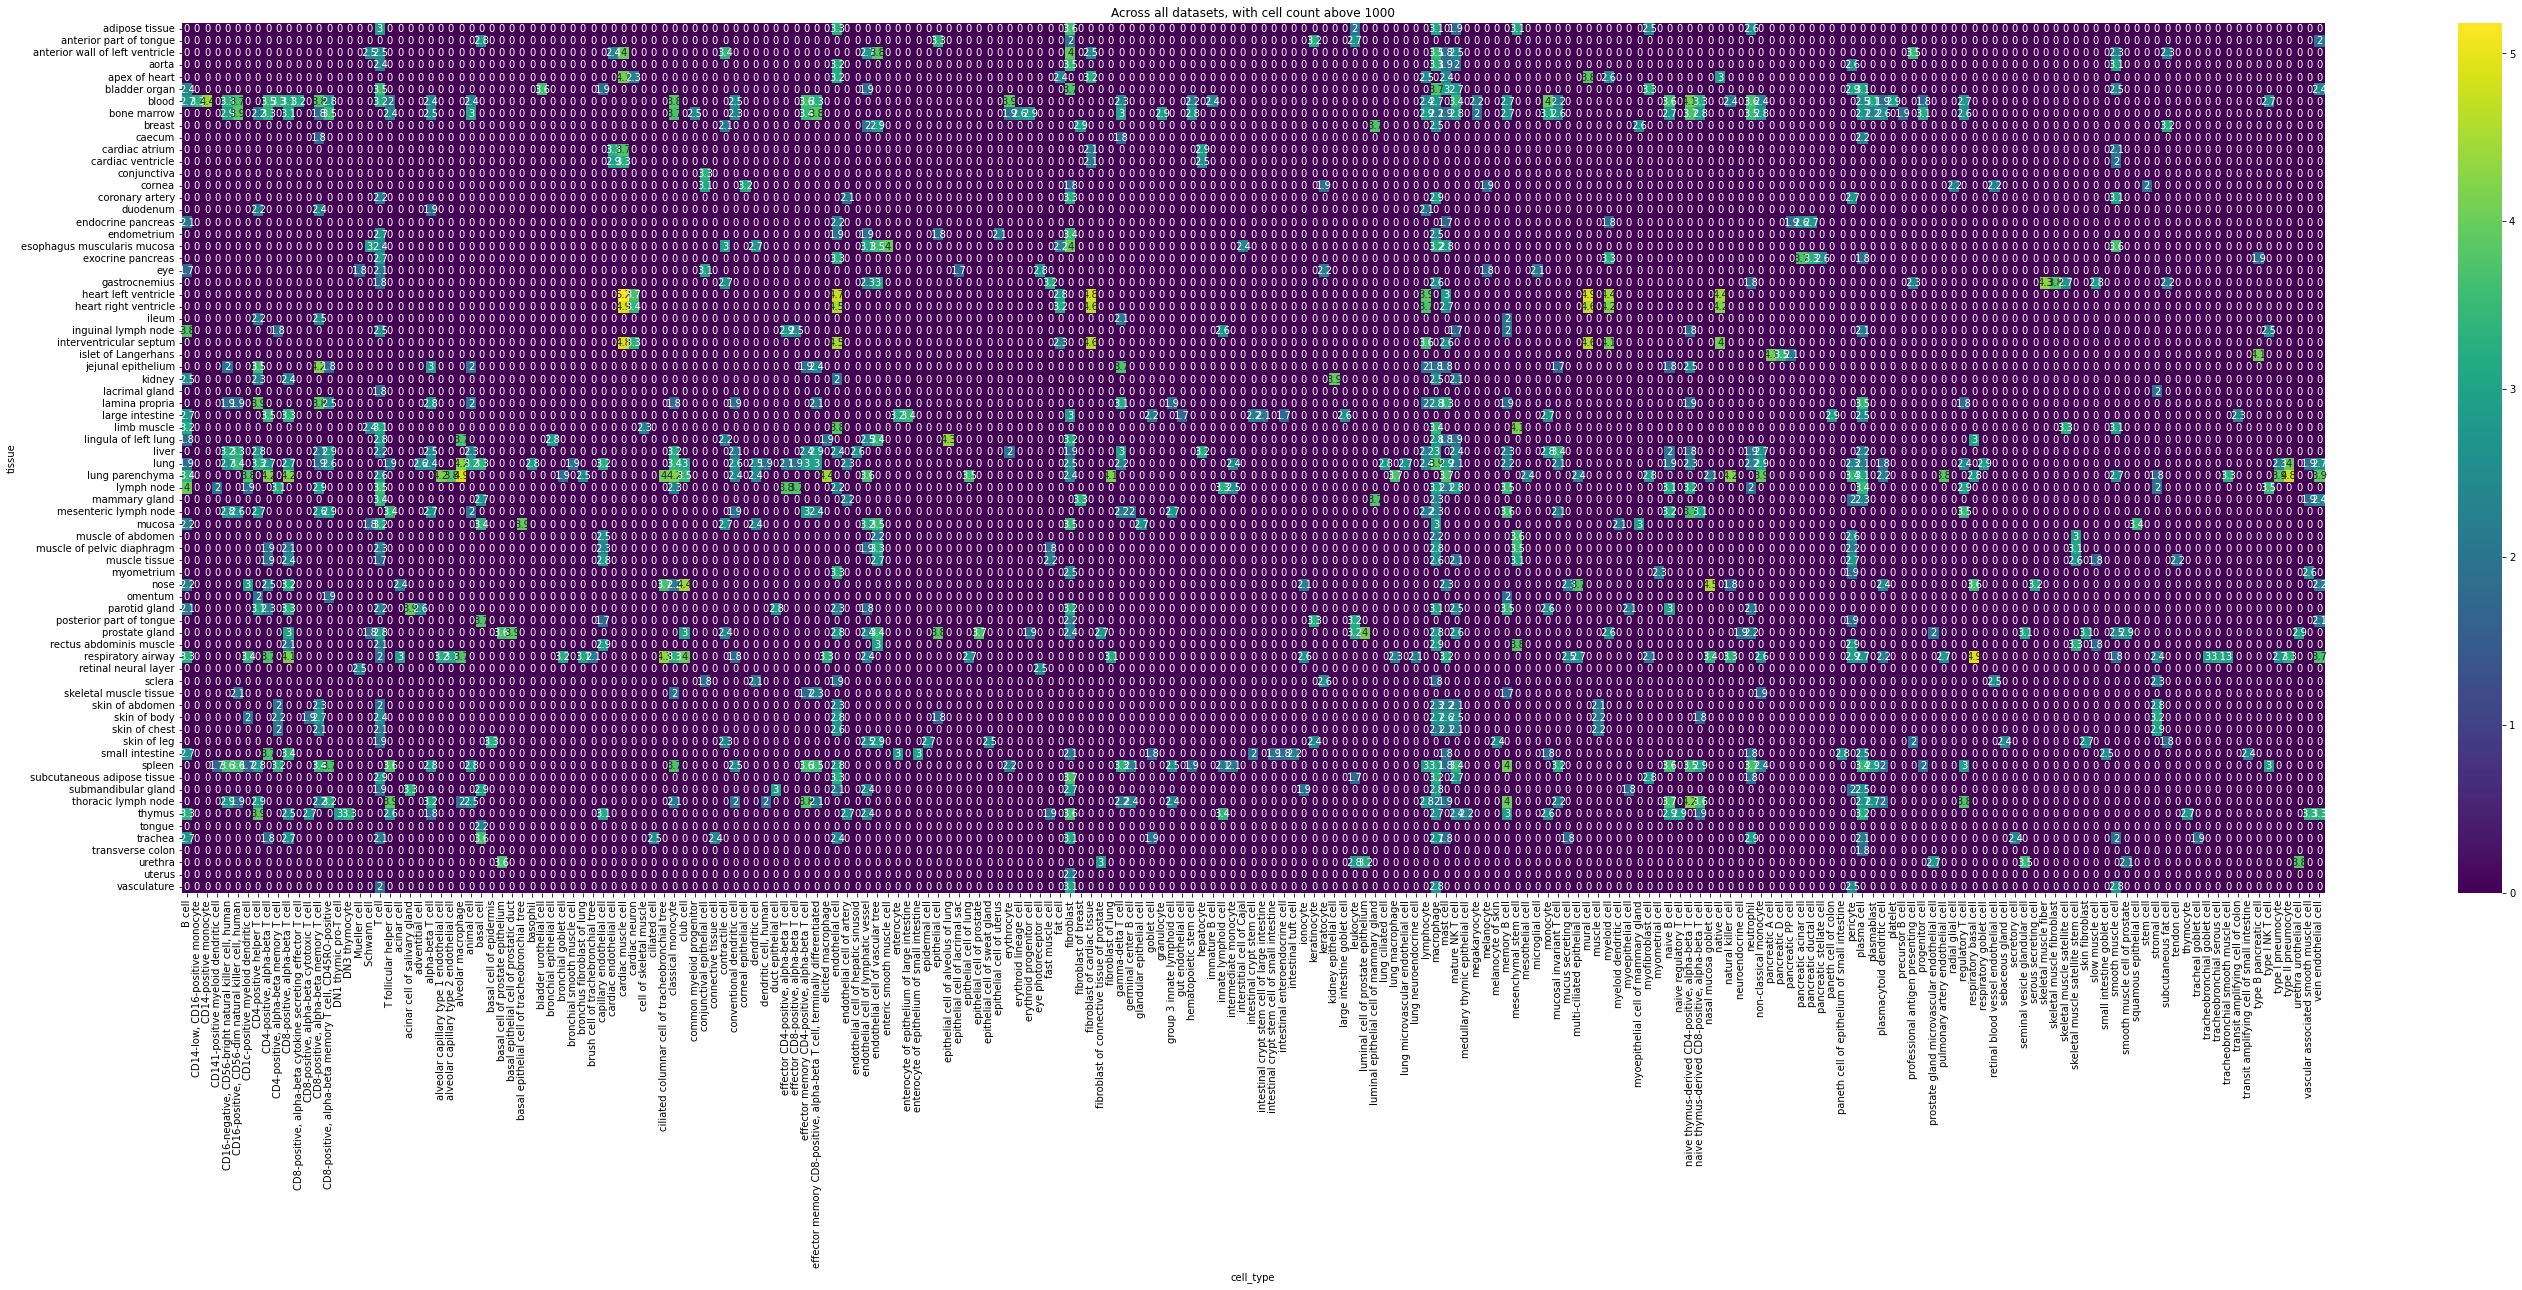

In [12]:
plt.figure(figsize=(48, 16))

# Create the heatmap
sns.heatmap(log_data, cmap='viridis', annot=True, xticklabels=True, yticklabels=True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.gca().set_title('Across all datasets, with cell count above 1000')

plt.show()